In [1]:
library(randtests)
library(effsize)

source("load_data.R")
source("plot_functions.R")

In [2]:
options(repr.plot.width=15, repr.plot.height=10)

In [3]:
ue4 <- load_ue4('../../data/ue4')
unity <- load_unity('../../data/unity')
so <- load_stackoverflow('../../data/stackoverflow')
se <- load_gamedev_se('../../data/gamedev_se')

# Size of data

In [4]:
tibble_shape <- function(db, t) {
  rows <- db[[t]] %>% nrow
  columns <- db[[t]] %>% names %>% length
  
  c(t, rows, columns)
}

In [5]:
# Number of rows and columns
tibble_shape(unity, 'questions')
tibble_shape(unity, 'answers')
tibble_shape(unity, 'comments')
tibble_shape(unity, 'users')

[1] "questions" "381055"    "15"

[1] "answers" "347264"  "11"

[1] "comments" "652091"   "10"

[1] "users"  "196954" "3"

In [6]:
# Number of rows and columns
tibble_shape(ue4, 'questions')
tibble_shape(ue4, 'answers')
tibble_shape(ue4, 'comments')
tibble_shape(ue4, 'users')

[1] "questions" "193338"    "15"

[1] "answers" "170269"  "11"

[1] "comments" "402494"   "10"

[1] "users" "80094" "3"

In [7]:
# Number of rows and columns
tibble_shape(so, 'questions')
tibble_shape(so, 'answers')
tibble_shape(so, 'comments')
tibble_shape(so, 'users')

[1] "questions" "64648"     "15"

[1] "answers" "73002"   "11"

[1] "comments" "228540"   "10"

[1] "users" "65735" "2"

In [8]:
# Number of rows and columns
tibble_shape(se, 'questions')
tibble_shape(se, 'answers')
tibble_shape(se, 'comments')
tibble_shape(se, 'users')

[1] "questions" "50395"     "15"

[1] "answers" "76478"   "11"

[1] "comments" "211627"   "10"

[1] "users" "33735" "2"

In [9]:
# Number of months
unity$month_breaks %>% 
  length

ue4$month_breaks %>% 
  length

so$month_breaks %>% 
  length

se$month_breaks %>% 
  length

[1] 131

[1] 78

[1] 146

[1] 128

# RQ1

## 1.1 The  communities  were  less  active  in  the  past few  years

### 1.1.1 Posts per month

#### Unity

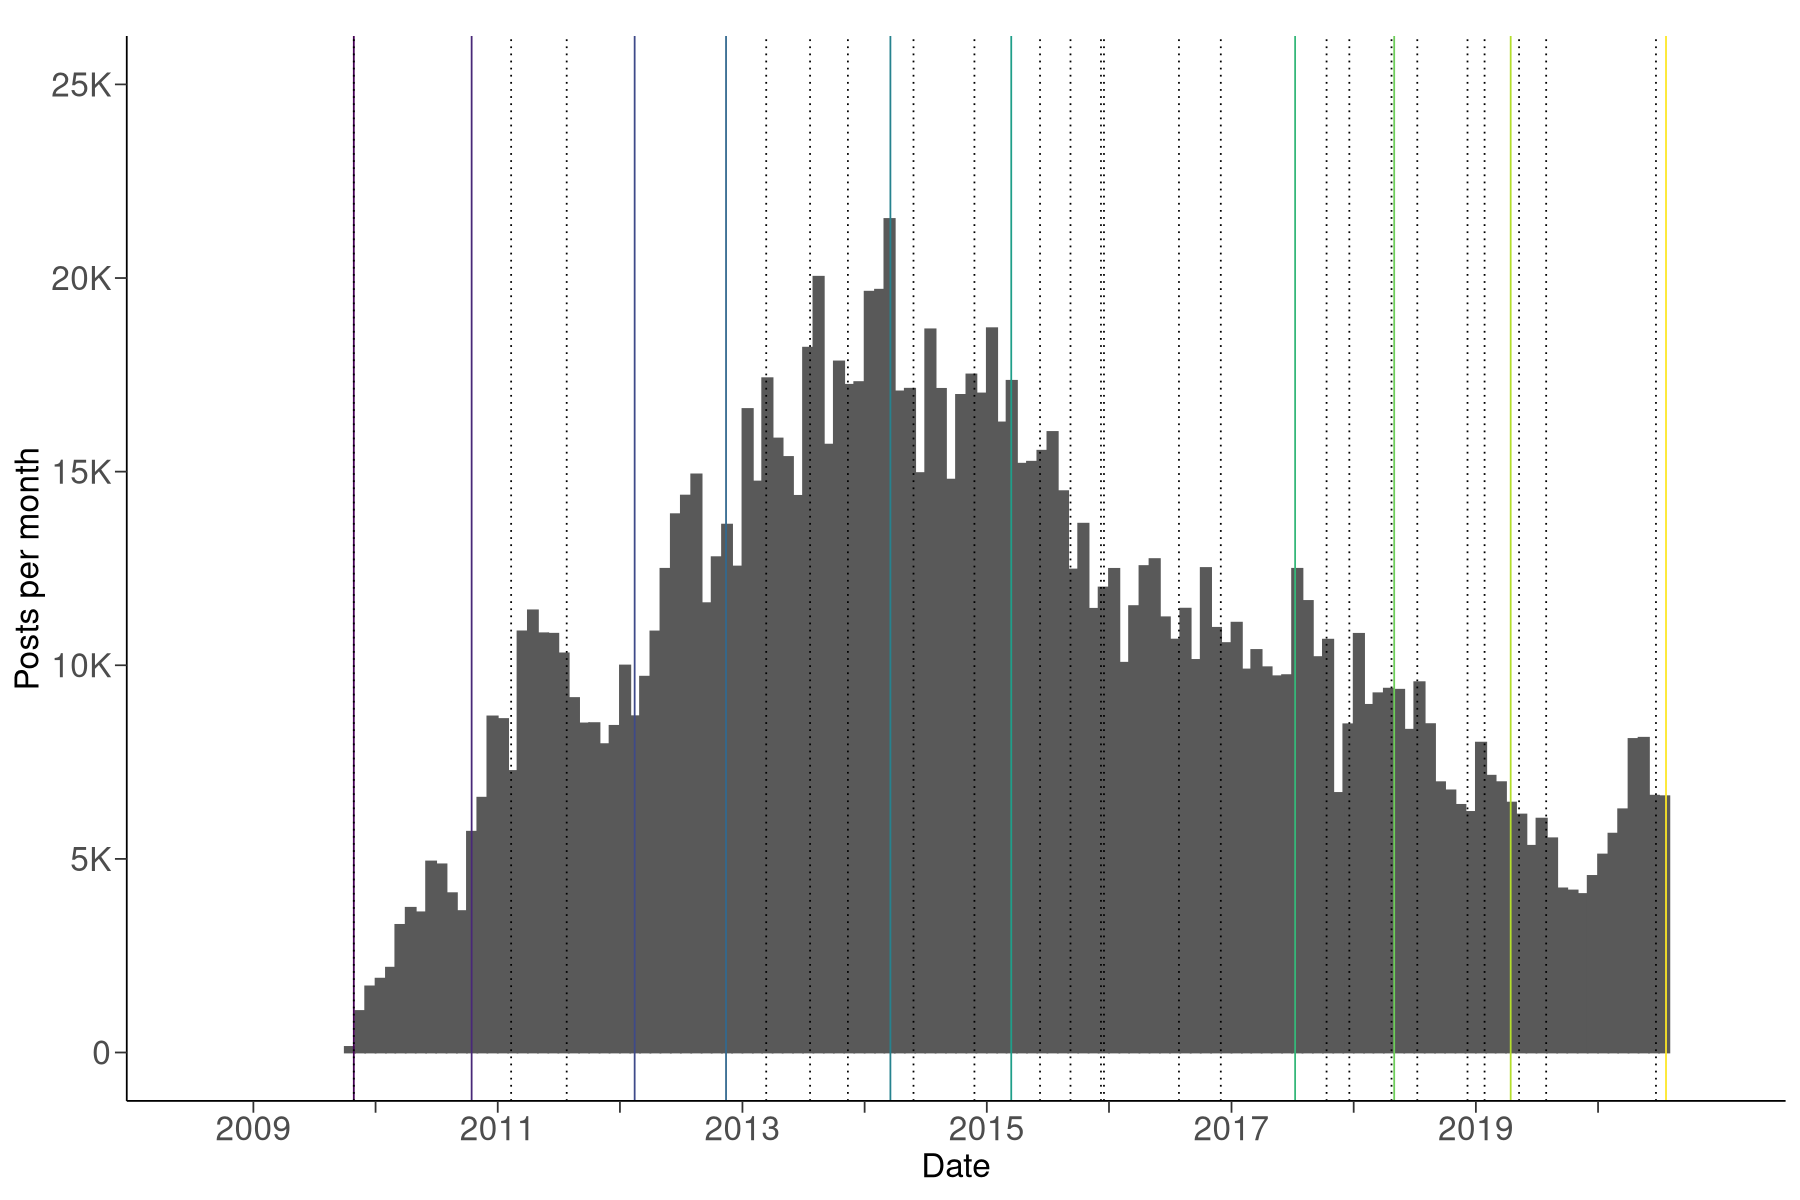

In [10]:
hist_posts_per_month_events(unity, so$month_breaks) %>% 
save('figures/unity_posts.pdf')

In [11]:
unity$ppm %>% 
filter(n_posts == max(n_posts))

post_month,n_posts
<date>,<int>
2014-03-01,21525


In [12]:
# Decreasing trend after 2014
unity$ppm %>% 
  filter(post_month >= ymd("2014-03-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 0, n = 39, p-value = 1.819e-12
alternative hypothesis: decreasing trend


In [13]:
# Increasing trend before 2014
unity$ppm %>% 
  filter(post_month < ymd("2014-01-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 25, n = 25, p-value = 2.98e-08
alternative hypothesis: increasing trend


In [14]:
change <- function(aft, bef) {
  bef/aft-1
}

# Decrease in posts per month after 2014
unity$ppm %>% 
  filter(post_month != max(post_month)) %>% 
  filter(post_month > ymd('2014-01-01')) %>% 
  filter(
    n_posts == max(n_posts) |
    n_posts == min(n_posts)
  )  %>% 
  mutate(inc = change(max(n_posts), min(n_posts)))

post_month,n_posts,inc
<date>,<int>,<dbl>
2014-03-01,21525,-0.809849
2019-11-01,4093,-0.809849


#### UE4

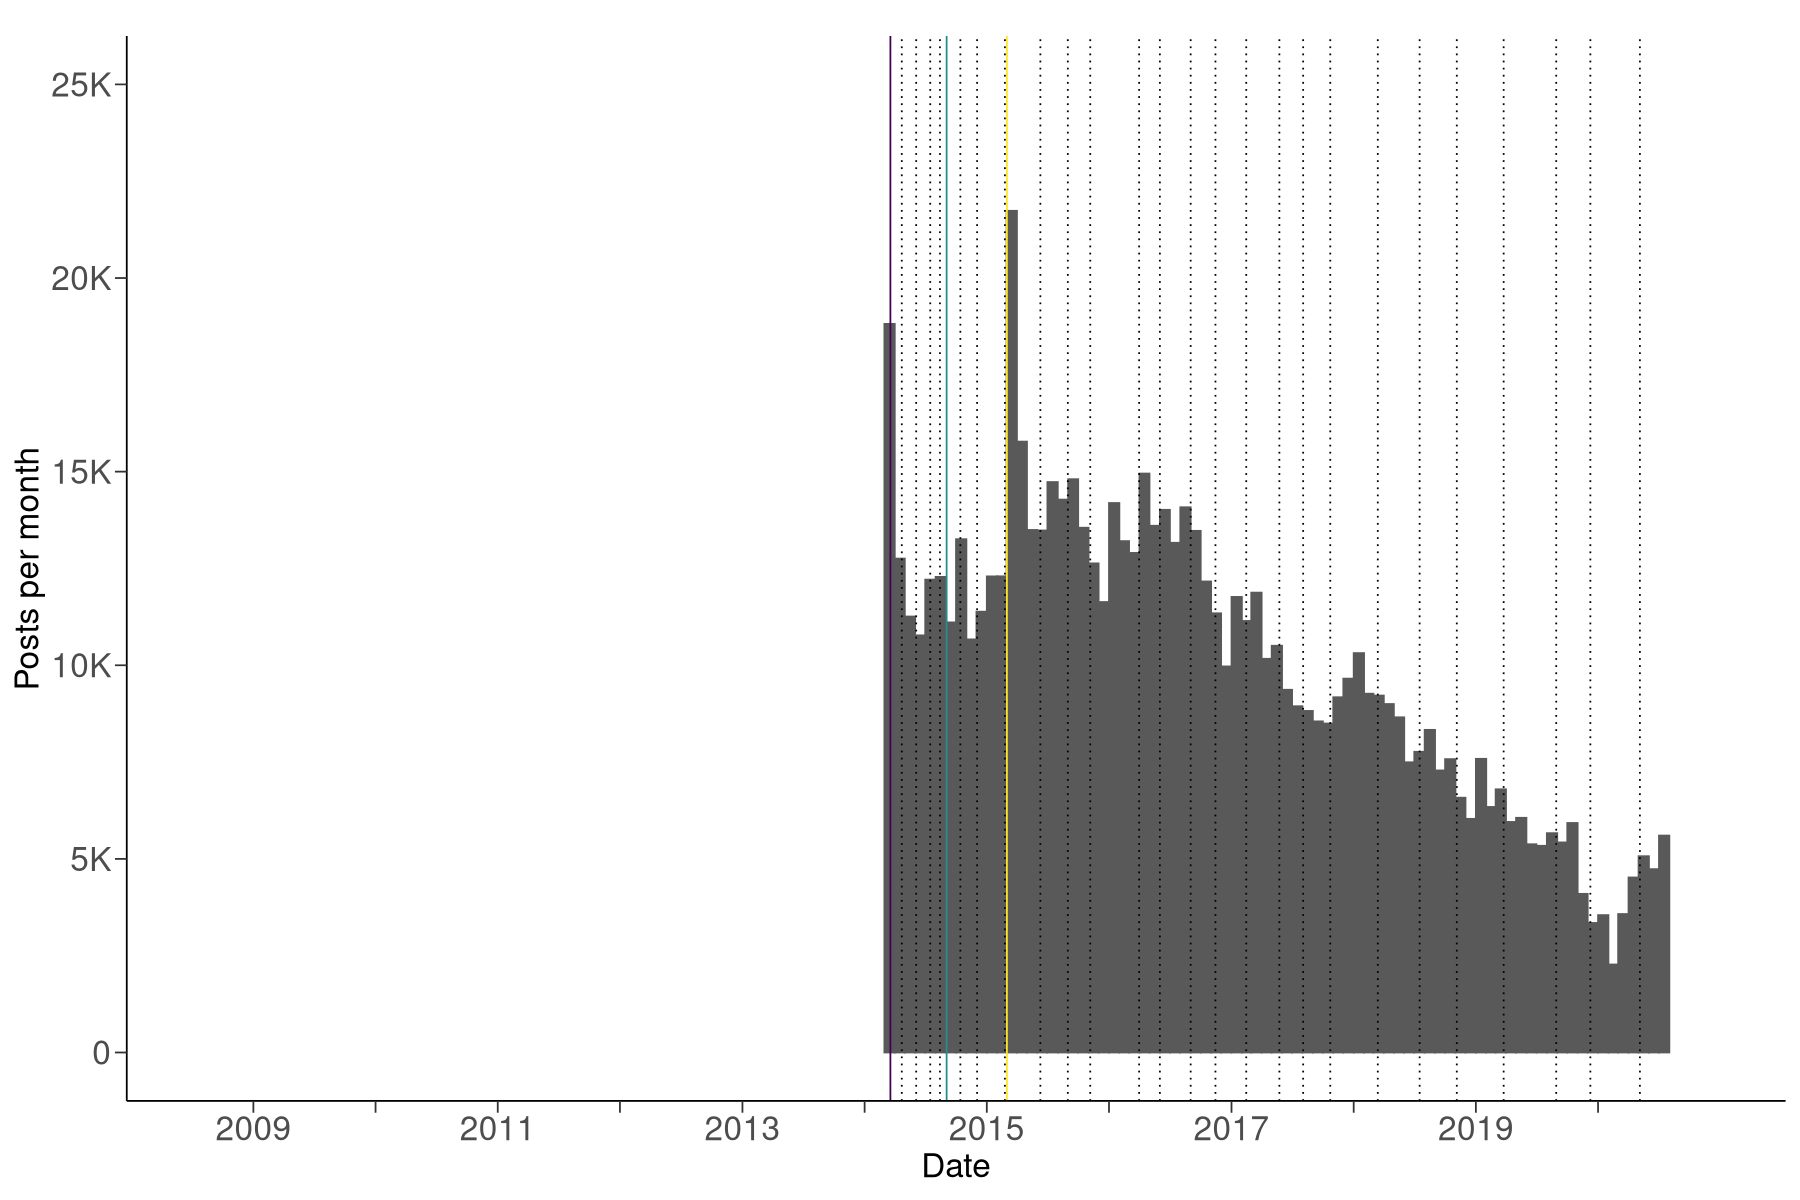

In [15]:
hist_posts_per_month_events(ue4, so$month_breaks) %>% 
save('figures/ue4_posts.pdf')

In [16]:
ue4$ppm %>% 
filter(n_posts == max(n_posts))

post_month,n_posts
<date>,<int>
2015-03-01,21736


In [17]:
# Decreasing trend after 2015
ue4$ppm %>% 
  filter(post_month >= ymd("2015-03-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 0, n = 33, p-value = 1.164e-10
alternative hypothesis: decreasing trend


In [18]:
# Stability during first year
ue4$ppm %>% 
  filter(post_month < ymd("2015-03-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 4, n = 6, p-value = 0.6875
alternative hypothesis: non randomness


In [19]:
# Decrease in posts per month after 2015
ue4$ppm %>% 
  filter(!is.na(post_month)) %>% 
  filter(post_month != max(post_month)) %>% 
  filter(post_month > ymd('2015-01-01')) %>% 
  filter(
    n_posts == max(n_posts) |
    n_posts == min(n_posts)
  )  %>% 
  mutate(inc = change(max(n_posts), min(n_posts)))

post_month,n_posts,inc
<date>,<int>,<dbl>
2015-03-01,21736,-0.8954269
2020-02-01,2273,-0.8954269


#### Stack Overflow

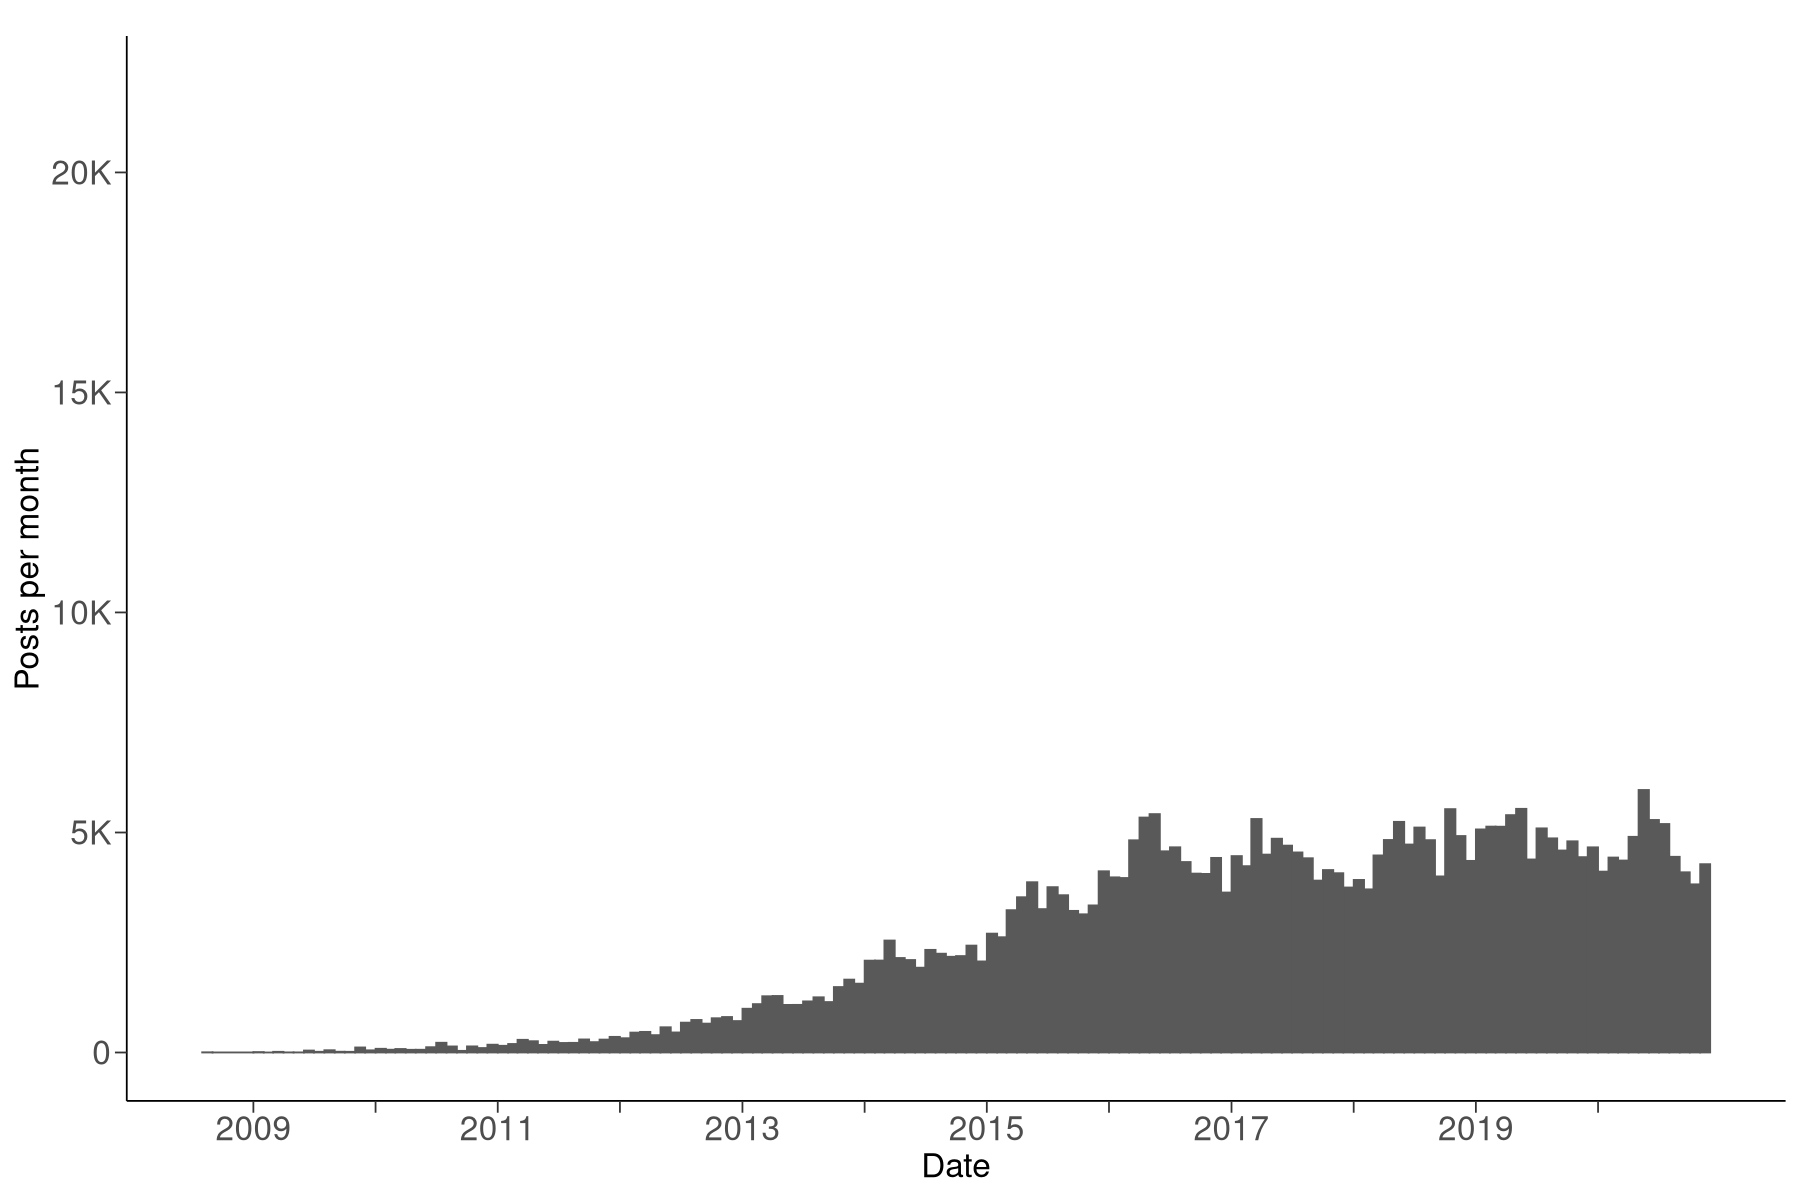

In [20]:
hist_posts_per_month(so, so$month_breaks) %>% 
save('figures/so_posts.pdf')

In [21]:
# Increasing trend before 2016
so$ppm %>% 
  filter(post_month <= ymd("2016-05-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 45, n = 45, p-value = 2.842e-14
alternative hypothesis: increasing trend


In [22]:
# Stability after 2016
so$ppm %>% 
  filter(post_month >= ymd("2016-05-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 19, n = 28, p-value = 0.08716
alternative hypothesis: non randomness


#### Stack Exchange

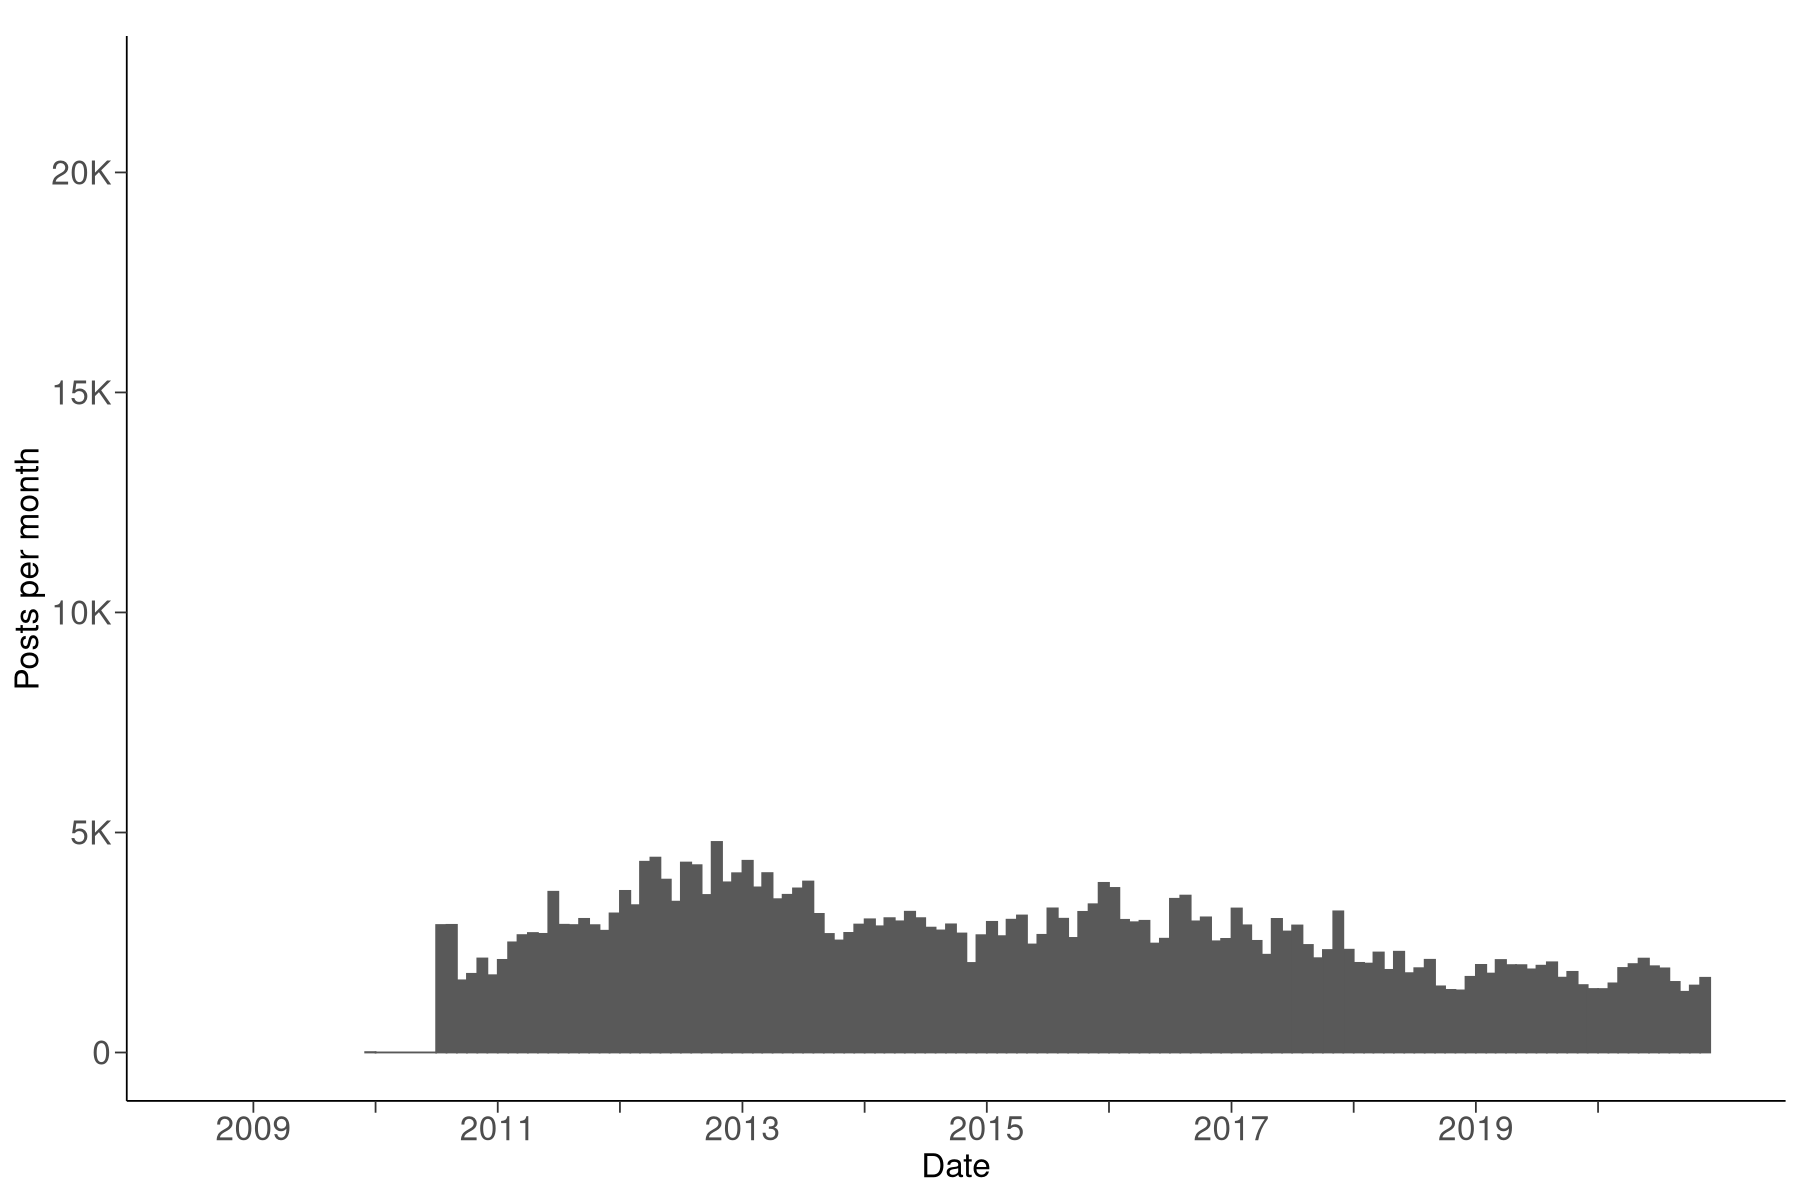

In [23]:
hist_posts_per_month(se, so$month_breaks) %>% 
save('figures/se_posts.pdf')

In [24]:
se$ppm %>% 
filter(n_posts == max(n_posts))

post_month,n_posts
<date>,<int>
2012-10-01,4785


In [25]:
# Increasing trend before 2012
se$ppm %>% 
  filter(post_month < ymd("2012-10-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 11, n = 14, p-value = 0.02869
alternative hypothesis: increasing trend


In [26]:
# Stability during after 2016
se$ppm %>% 
  filter(post_month >= ymd("2012-10-01")) %>% 
  .$n_posts %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 1, n = 49, p-value = 8.882e-14
alternative hypothesis: decreasing trend


In [27]:
# Decrease in posts per month after 2012
se$ppm %>% 
  filter(!is.na(post_month)) %>% 
  filter(post_month != max(post_month)) %>% 
  filter(post_month >= ymd('2012-10-01')) %>% 
  filter(
    n_posts == max(n_posts) |
    n_posts == min(n_posts)
  )  %>% 
  mutate(inc = change(max(n_posts), min(n_posts)))

post_month,n_posts,inc
<date>,<int>,<dbl>
2012-10-01,4785,-0.7115987
2020-09-01,1380,-0.7115987


### 1.1.2 Users per month

#### Unity

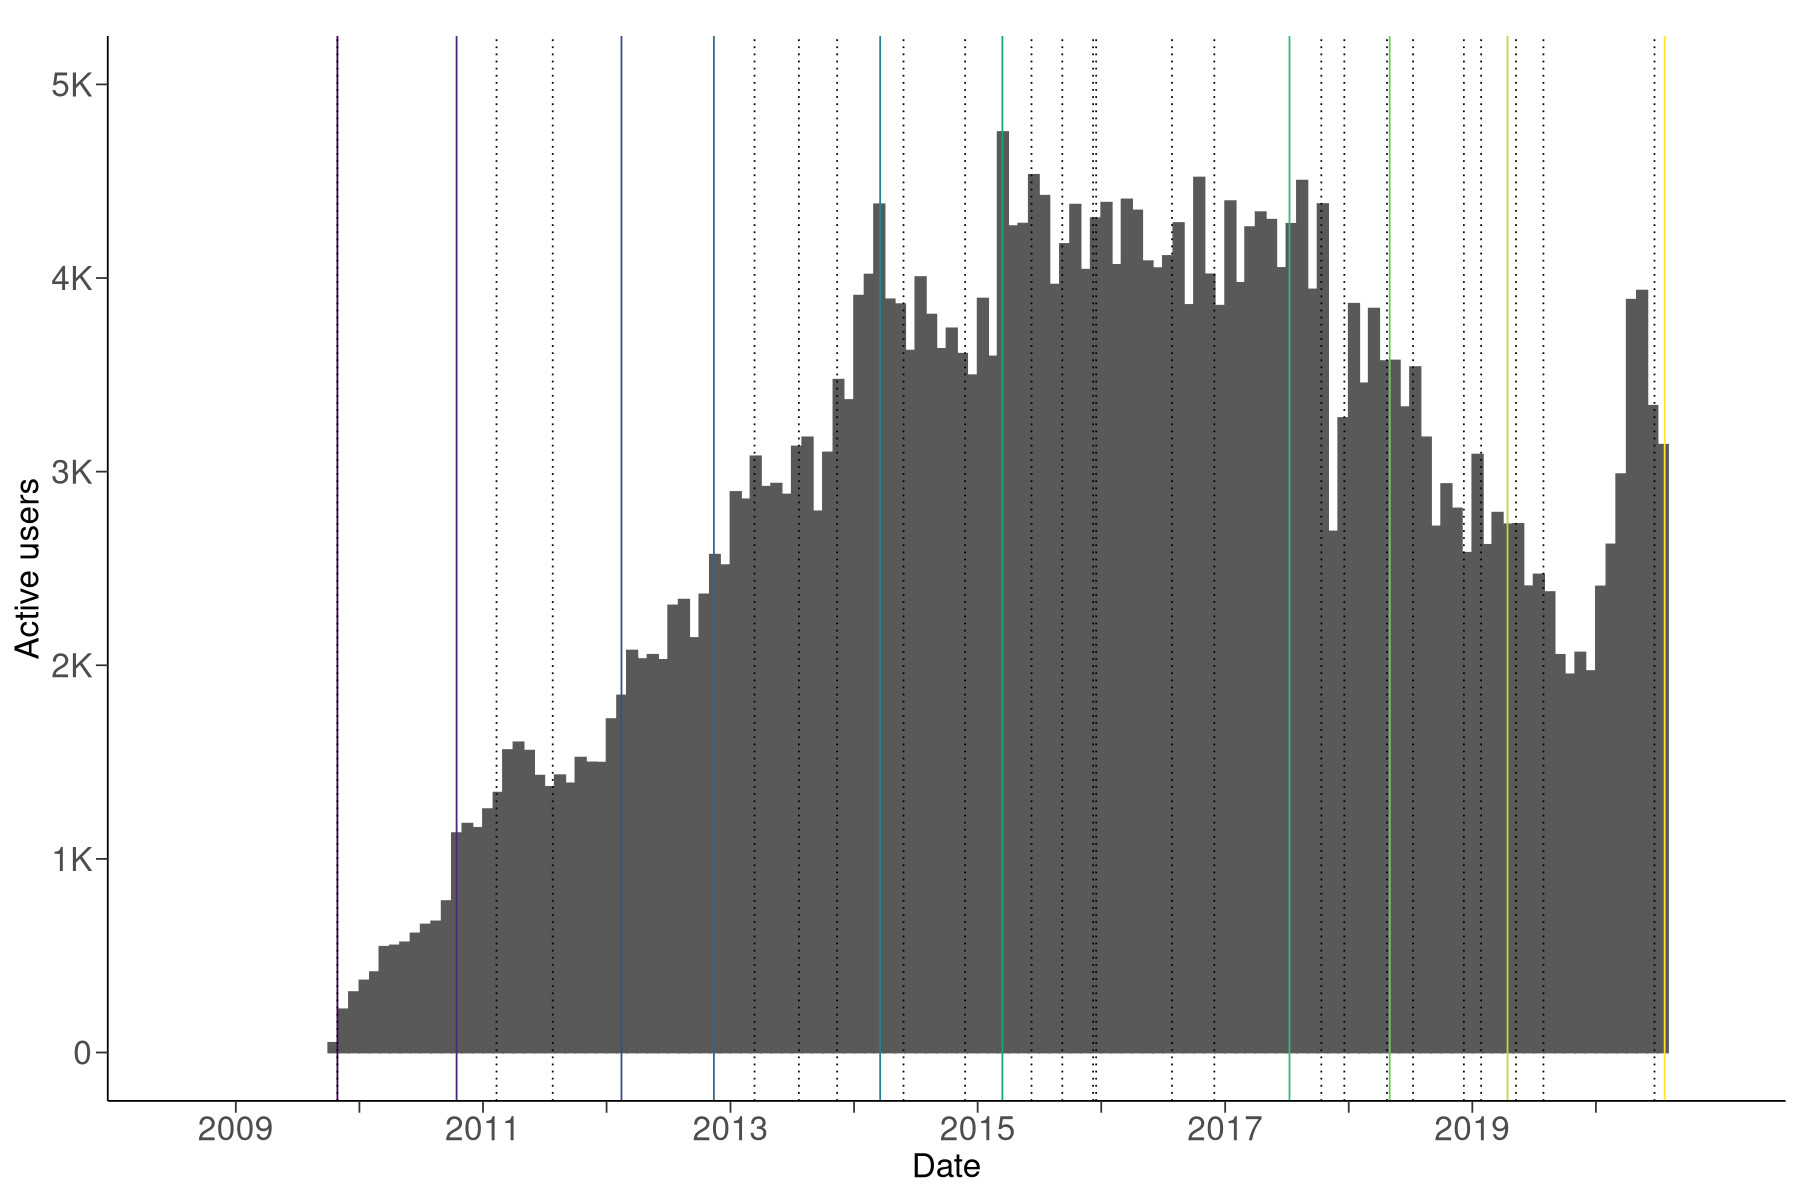

In [28]:
hist_active_users_per_month_events(unity, so$month_breaks) %>% 
save('figures/unity_users.pdf')

In [29]:
# Increase before 2014
unity$aupm %>% 
  filter(post_month < ymd("2014-01-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 25, n = 25, p-value = 2.98e-08
alternative hypothesis: increasing trend


In [30]:
# Stability between 2014 and 2017
unity$aupm %>% 
  filter(post_month >= ymd("2014-01-01") & post_month < ymd("2017-10-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 15, n = 22, p-value = 0.1338
alternative hypothesis: non randomness


In [31]:
# Decrease from late 2017 to early 2020
unity$aupm %>% 
  filter(post_month >= ymd("2017-10-01"), post_month <= ymd("2020-01-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 1, n = 14, p-value = 0.0009155
alternative hypothesis: decreasing trend


In [32]:
# Decrease after 2017
unity$aupm %>% 
  filter(post_month != max(post_month)) %>% 
  filter(post_month > ymd('2017-01-01')) %>% 
  filter(
    n_users == max(n_users) |
    n_users == min(n_users)
  ) %>% 
  mutate(inc = change(max(n_users), min(n_users)))

post_month,n_users,inc
<date>,<int>,<dbl>
2017-08-01,4503,-0.5662891
2019-10-01,1953,-0.5662891


#### UE4

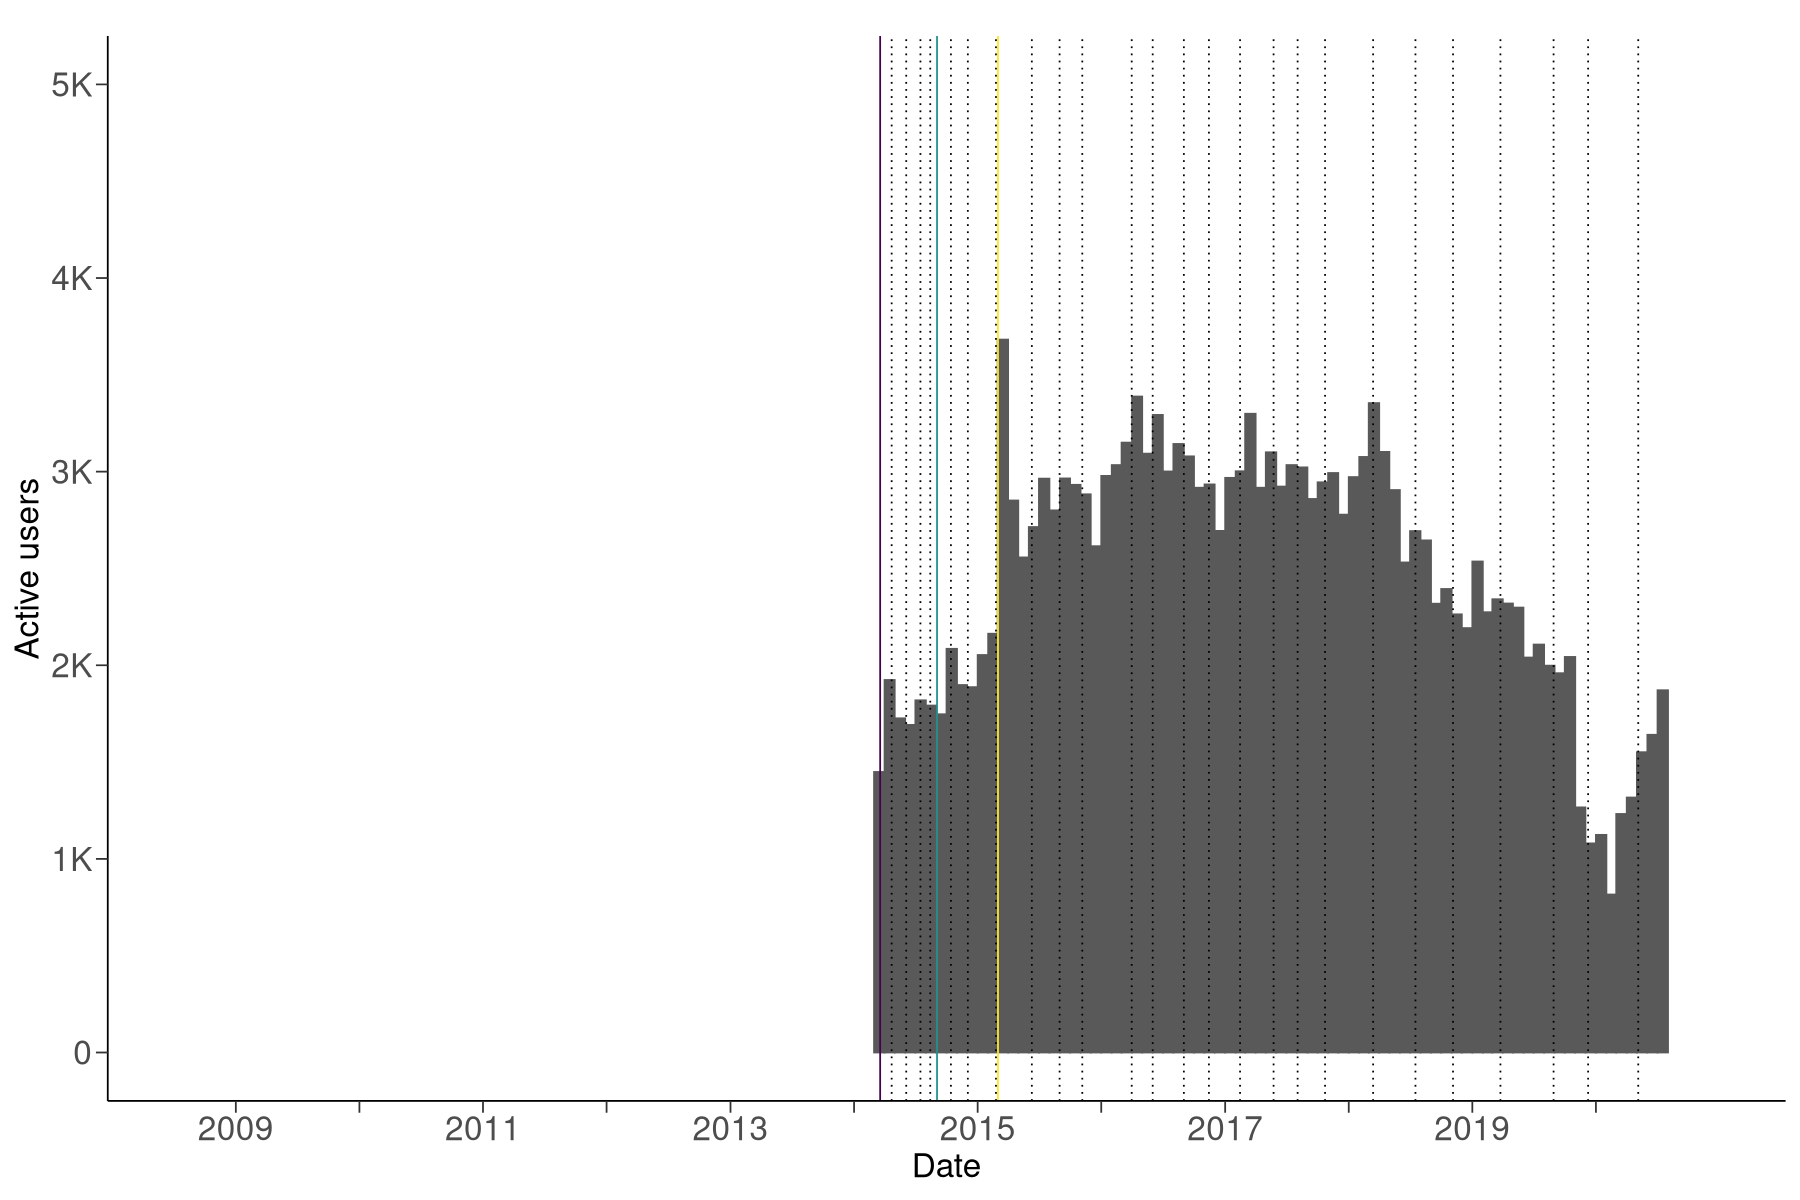

In [33]:
hist_active_users_per_month_events(ue4, so$month_breaks) %>% 
save('figures/ue4_users.pdf')

In [34]:
# Increase before 2014
ue4$aupm %>% 
  filter(post_month < ymd("2015-03-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 6, n = 6, p-value = 0.01562
alternative hypothesis: increasing trend


In [35]:
# Increase before 2014
ue4$aupm %>% 
  filter(post_month >= ymd("2015-03-01") & post_month < ymd("2017-10-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 8, n = 15, p-value = 1
alternative hypothesis: non randomness


In [36]:
# Decrease from late 2017 to early 2020
ue4$aupm %>% 
  filter(post_month >= ymd("2017-10-01"), post_month <= ymd("2020-01-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 0, n = 14, p-value = 6.104e-05
alternative hypothesis: decreasing trend


In [37]:
# Decrease after 2017
ue4$aupm %>% 
  filter(!is.na(post_month)) %>% 
  filter(post_month != max(post_month)) %>% 
  filter(post_month >= ymd('2017-10-01')) %>% 
  filter(
    n_users == max(n_users) |
    n_users == min(n_users)
  ) %>% 
  mutate(inc = change(max(n_users), min(n_users)))

post_month,n_users,inc
<date>,<int>,<dbl>
2018-03-01,3354,-0.7567084
2020-02-01,816,-0.7567084


#### Stack Overflow

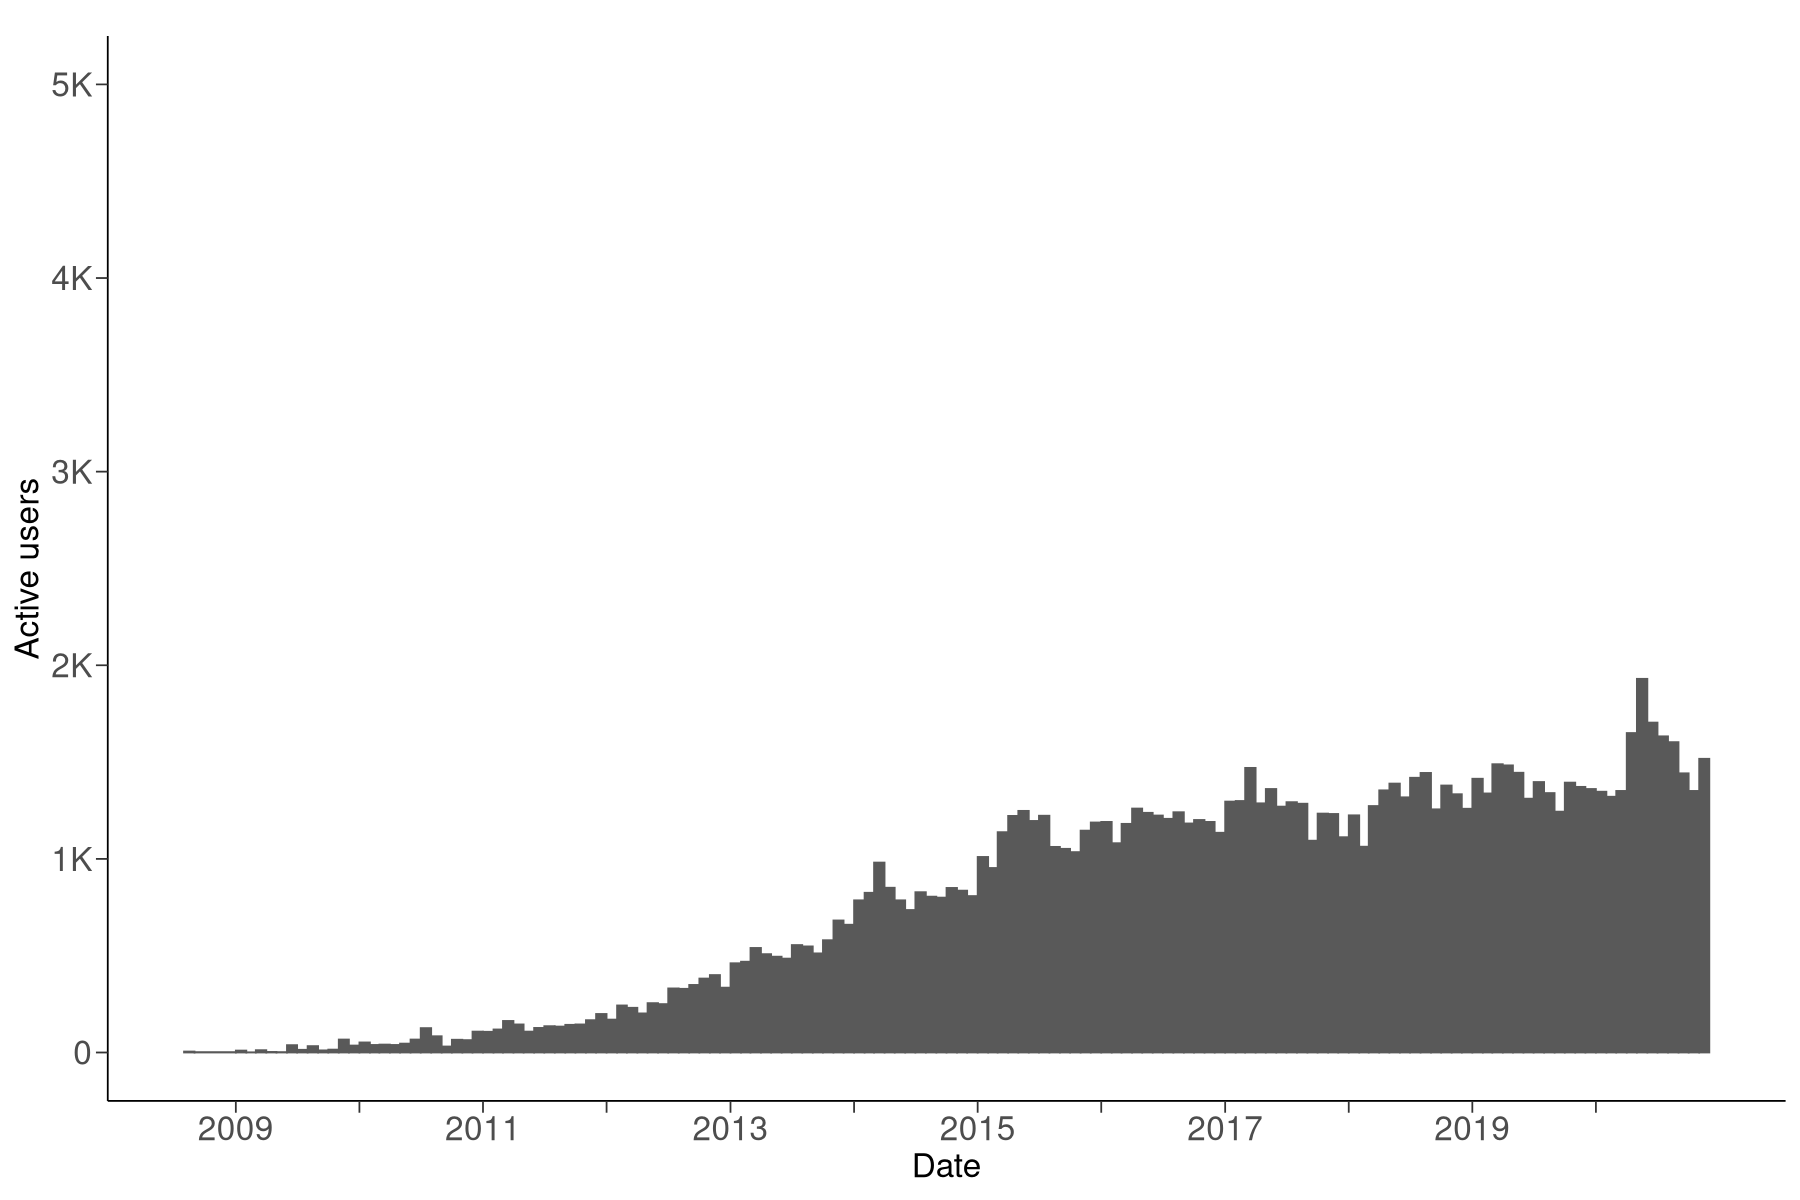

In [38]:
hist_active_users_per_month(so, so$month_breaks) %>% 
save('figures/so_users.pdf')

In [39]:
so$aupm %>% filter(n_users == max(n_users))

post_month,n_users
<date>,<int>
2020-05-01,1930


In [40]:
so$aupm %>% 
  filter(post_month < ymd("2016-03-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 44, n = 44, p-value = 5.684e-14
alternative hypothesis: increasing trend


#### Game dev

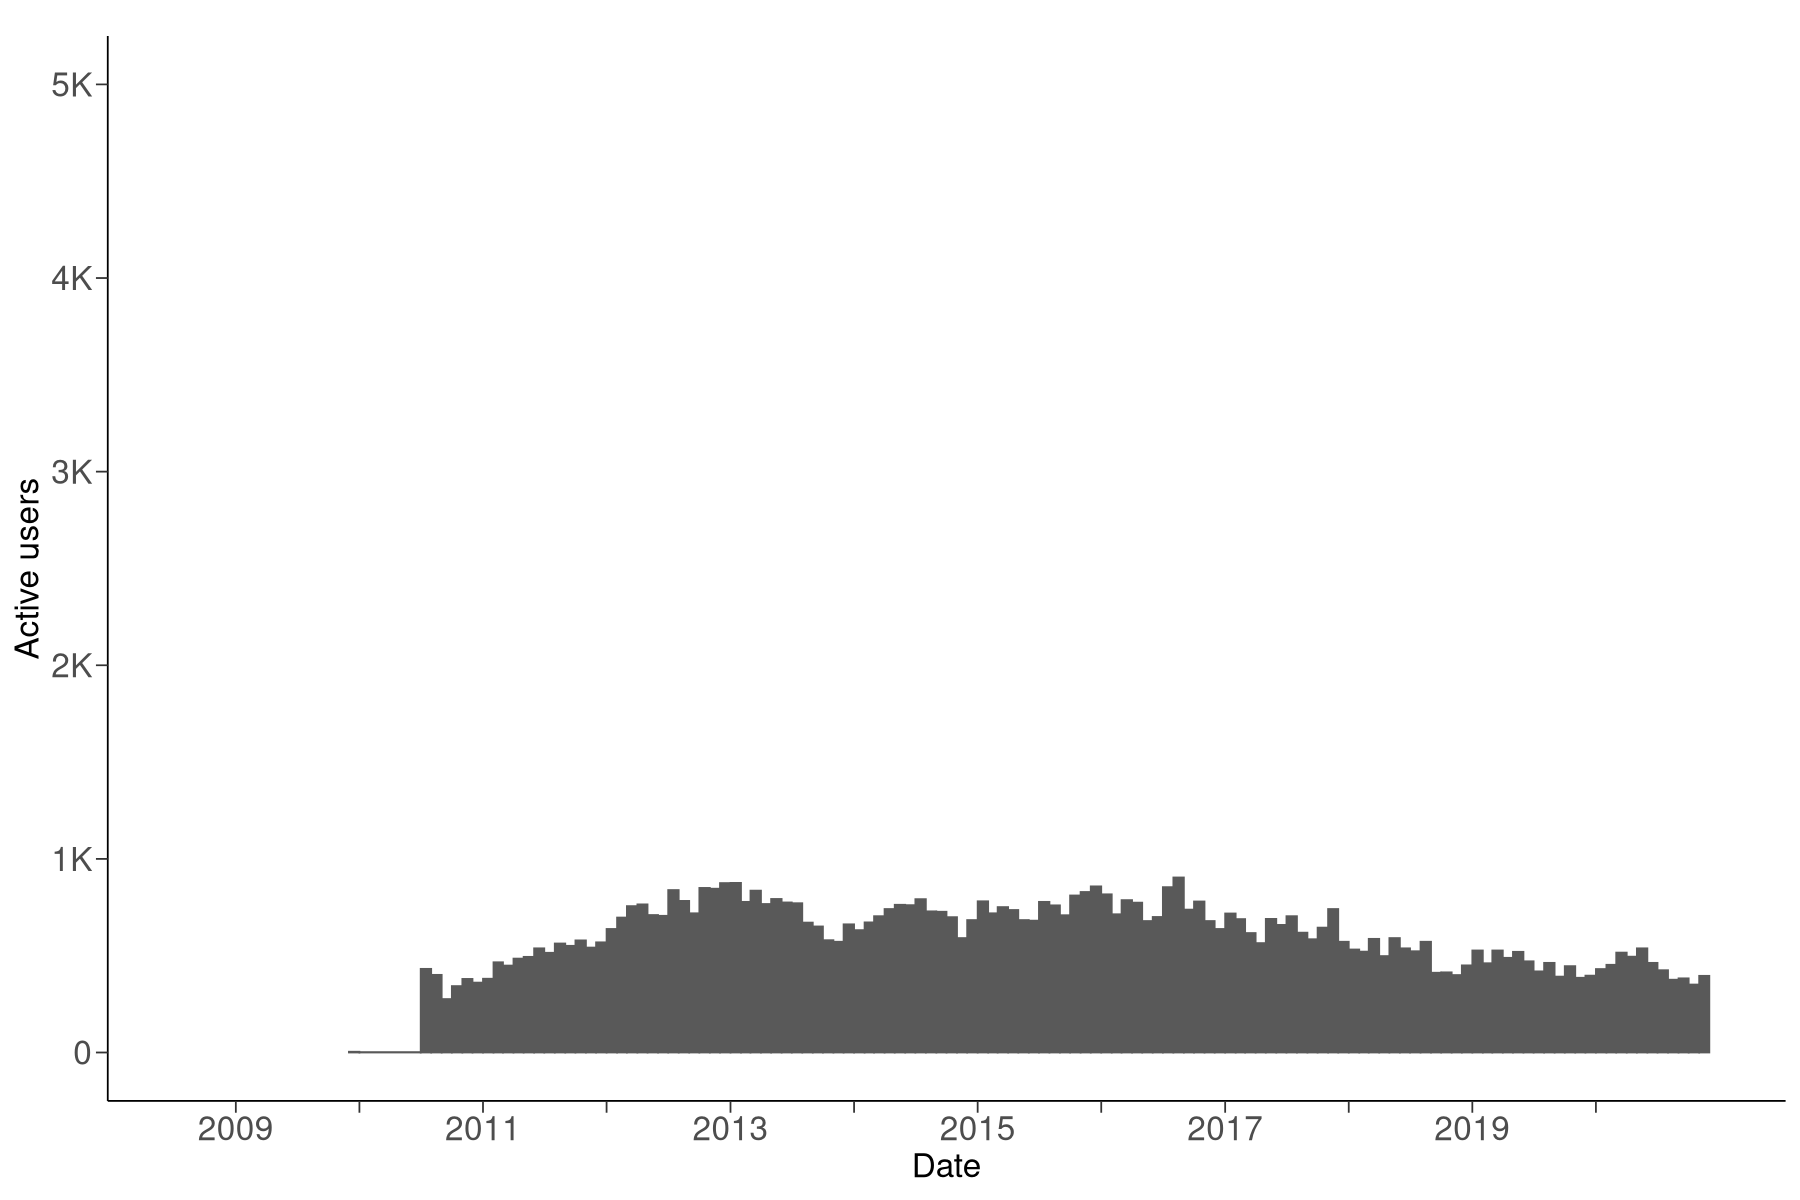

In [41]:
hist_active_users_per_month(se, so$month_breaks) %>% 
save('figures/se_users.pdf')

In [42]:
# Increase before 2013
se$aupm %>% 
  filter(post_month < ymd("2013-02-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("right.sided")


	Cox Stuart test

data:  .
statistic = 16, n = 16, p-value = 1.526e-05
alternative hypothesis: increasing trend


In [43]:
# Stability between 2013 and 2016
se$aupm %>% 
  filter(post_month >= ymd("2013-02-01") & post_month < ymd("2016-08-01") ) %>% 
  .$n_users %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 12, n = 21, p-value = 0.6636
alternative hypothesis: non randomness


In [44]:
# Decrease from late 2016
ue4$aupm %>% 
  filter(post_month >= ymd("2016-08-01")) %>% 
  .$n_users %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 0, n = 24, p-value = 5.96e-08
alternative hypothesis: decreasing trend


In [45]:
# Decrease after 2016
se$aupm %>% 
  filter(!is.na(post_month)) %>% 
  filter(post_month != max(post_month)) %>% 
  filter(post_month >= ymd('2016-08-01')) %>% 
  filter(
    n_users == max(n_users) |
    n_users == min(n_users)
  ) %>% 
  mutate(inc = change(max(n_users), min(n_users)))

post_month,n_users,inc
<date>,<int>,<dbl>
2016-08-01,904,-0.6117257
2020-10-01,351,-0.6117257


## 1.2 The  percentages  of  answered  and  resolved  questions decreased over time

### Unity

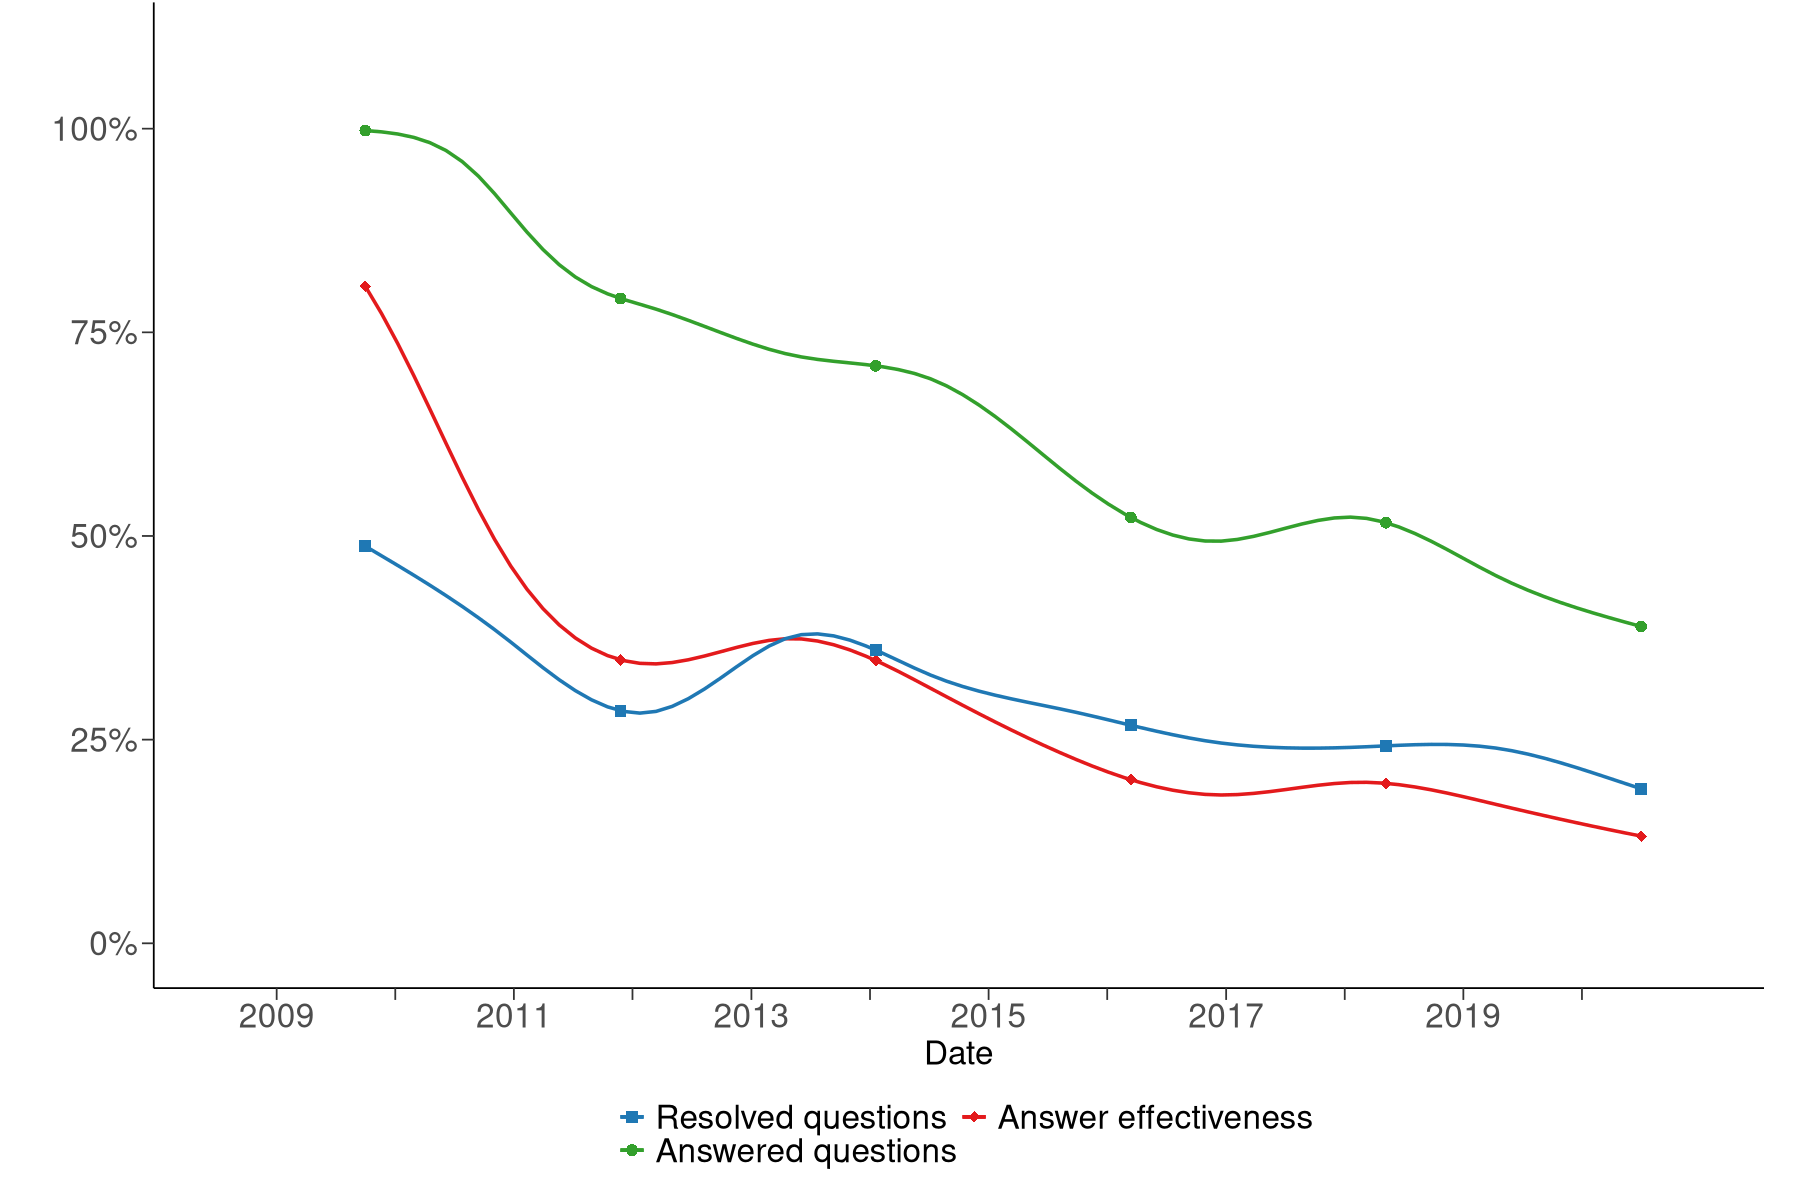

In [46]:
 # Warning! May take ~2 mins
smooth_percentages(unity, so$month_breaks) %>%
save('figures/unity_percentages.pdf')

In [47]:
# Decreases in percentages after Sep/2010
unity$percentages %>% 
  filter(post_month > ymd('2010-09-01')) %>% 
  summarise(
    p_value_ans = cox.stuart.test(answered, 'left.sided')$p.value,
    p_value_res = cox.stuart.test(resolved, 'left.sided')$p.value,
    p_value_eff = cox.stuart.test(answer_effectiveness, 'left.sided')$p.value,
  )

p_value_ans,p_value_res,p_value_eff
<dbl>,<dbl>,<dbl>
1.734723e-18,1.734723e-18,1.040834e-16


In [48]:
# Max and min answered percentages
unity$percentages %>% 
  filter(answered == max(answered) |
         answered == min(answered))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2009-10-01,1.0000000,0.9250000,0.4235294
2009-11-01,1.0000000,0.8759690,0.4557957
2009-12-01,1.0000000,0.8426150,0.4956395
2020-06-01,0.3437276,0.1125448,0.1801752


In [49]:
# Max and min resolved percentages
unity$percentages %>% 
  filter(resolved == max(resolved) |
         resolved == min(resolved))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2009-10-01,1.0000000,0.9250000,0.4235294
2020-06-01,0.3437276,0.1125448,0.1801752


### UE4

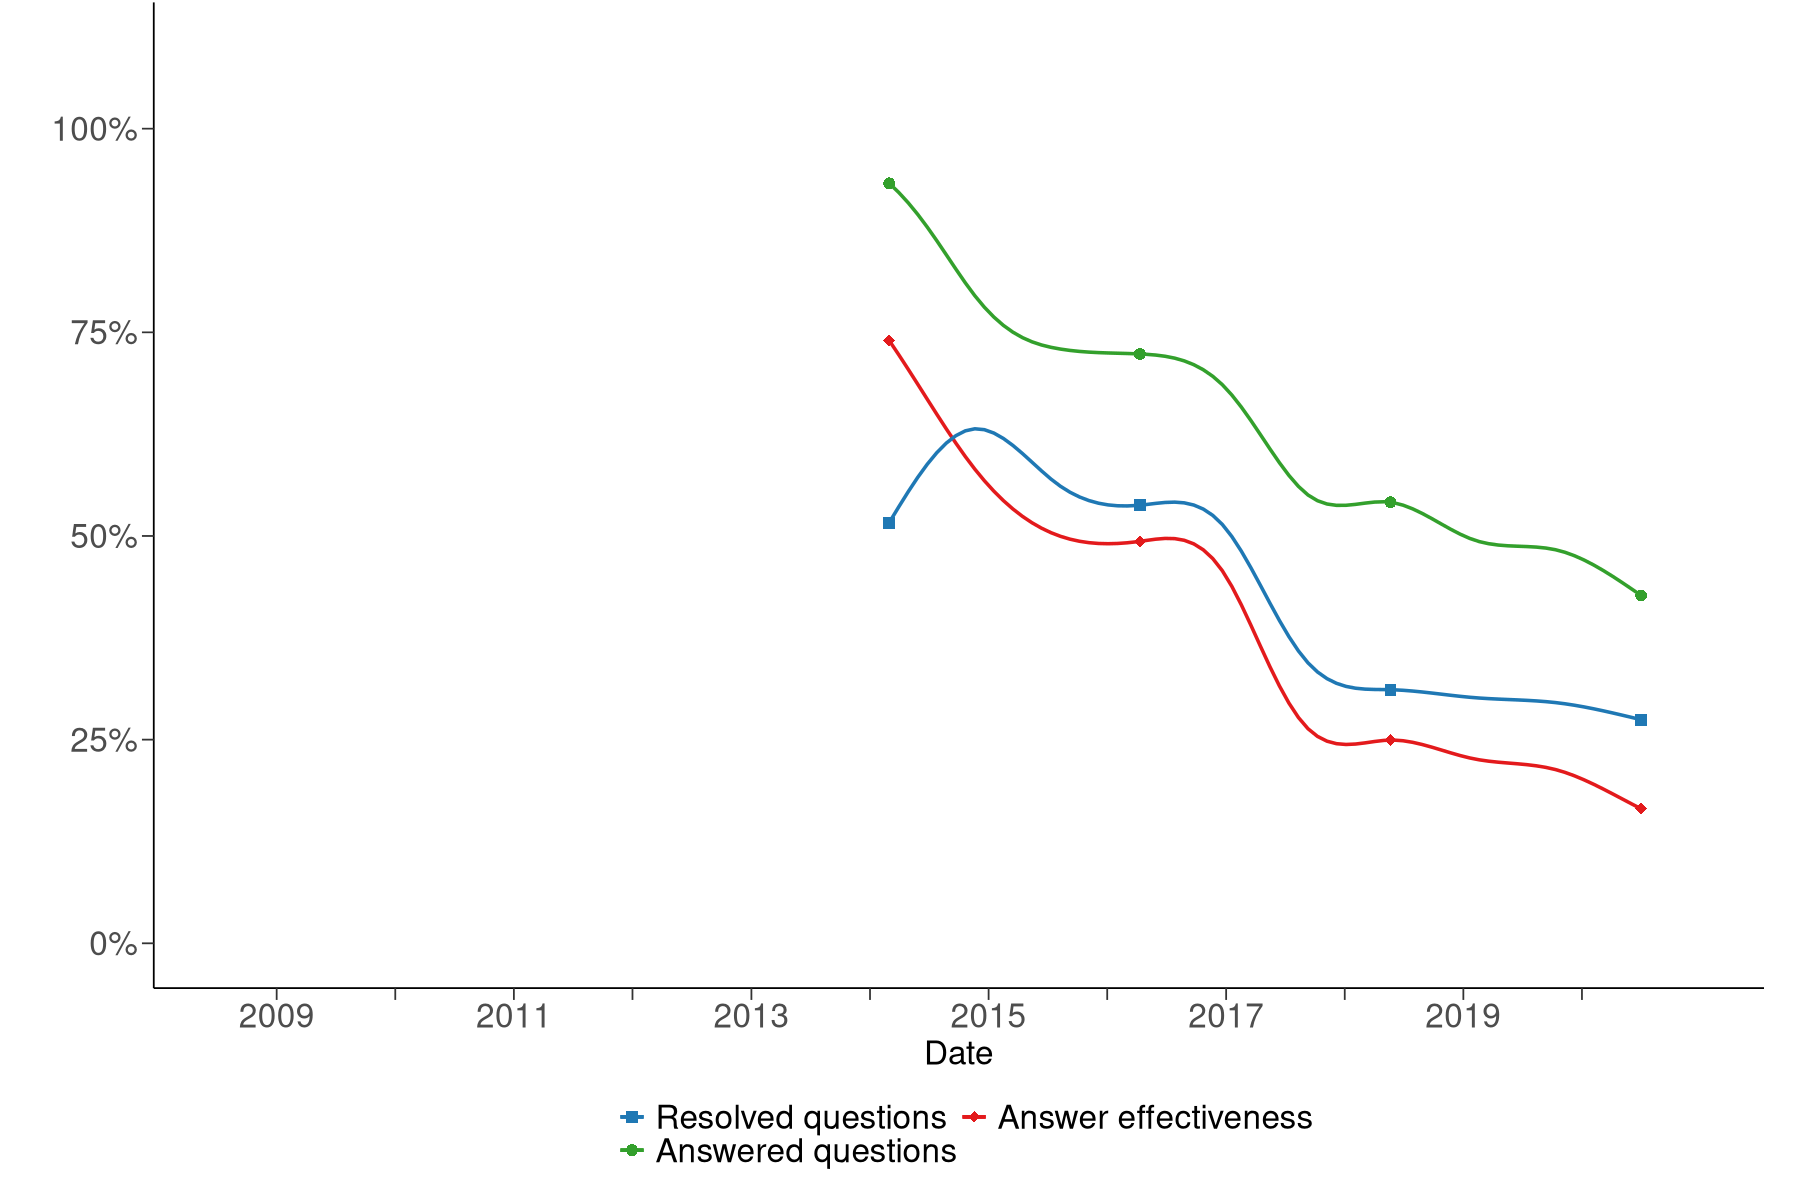

In [50]:
smooth_percentages(ue4, so$month_breaks) %>% 
save('figures/ue4_percentages.pdf')

In [51]:
# Decreases in percentages
ue4$percentages %>% 
  summarise(
    p_value_ans = cox.stuart.test(answered, 'left.sided')$p.value,
    p_value_res = cox.stuart.test(resolved, 'left.sided')$p.value,
    p_value_eff = cox.stuart.test(answer_effectiveness, 'left.sided')$p.value,
  )

p_value_ans,p_value_res,p_value_eff
<dbl>,<dbl>,<dbl>
3.637979e-12,3.637979e-12,3.637979e-12


In [52]:
# Max and min answered percentages
ue4$percentages %>% 
  filter(answered == max(answered) |
         answered == min(answered))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2014-03-01,0.9718713,0.8123957,0.5427109
2020-07-01,0.3679429,0.1421155,0.2340628


In [53]:
# Max and min resolved percentages
ue4$percentages %>% 
  filter(resolved == max(resolved) |
         resolved == min(resolved))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2014-03-01,0.9718713,0.8123957,0.5427109
2020-07-01,0.3679429,0.1421155,0.2340628


### Stack Overflow

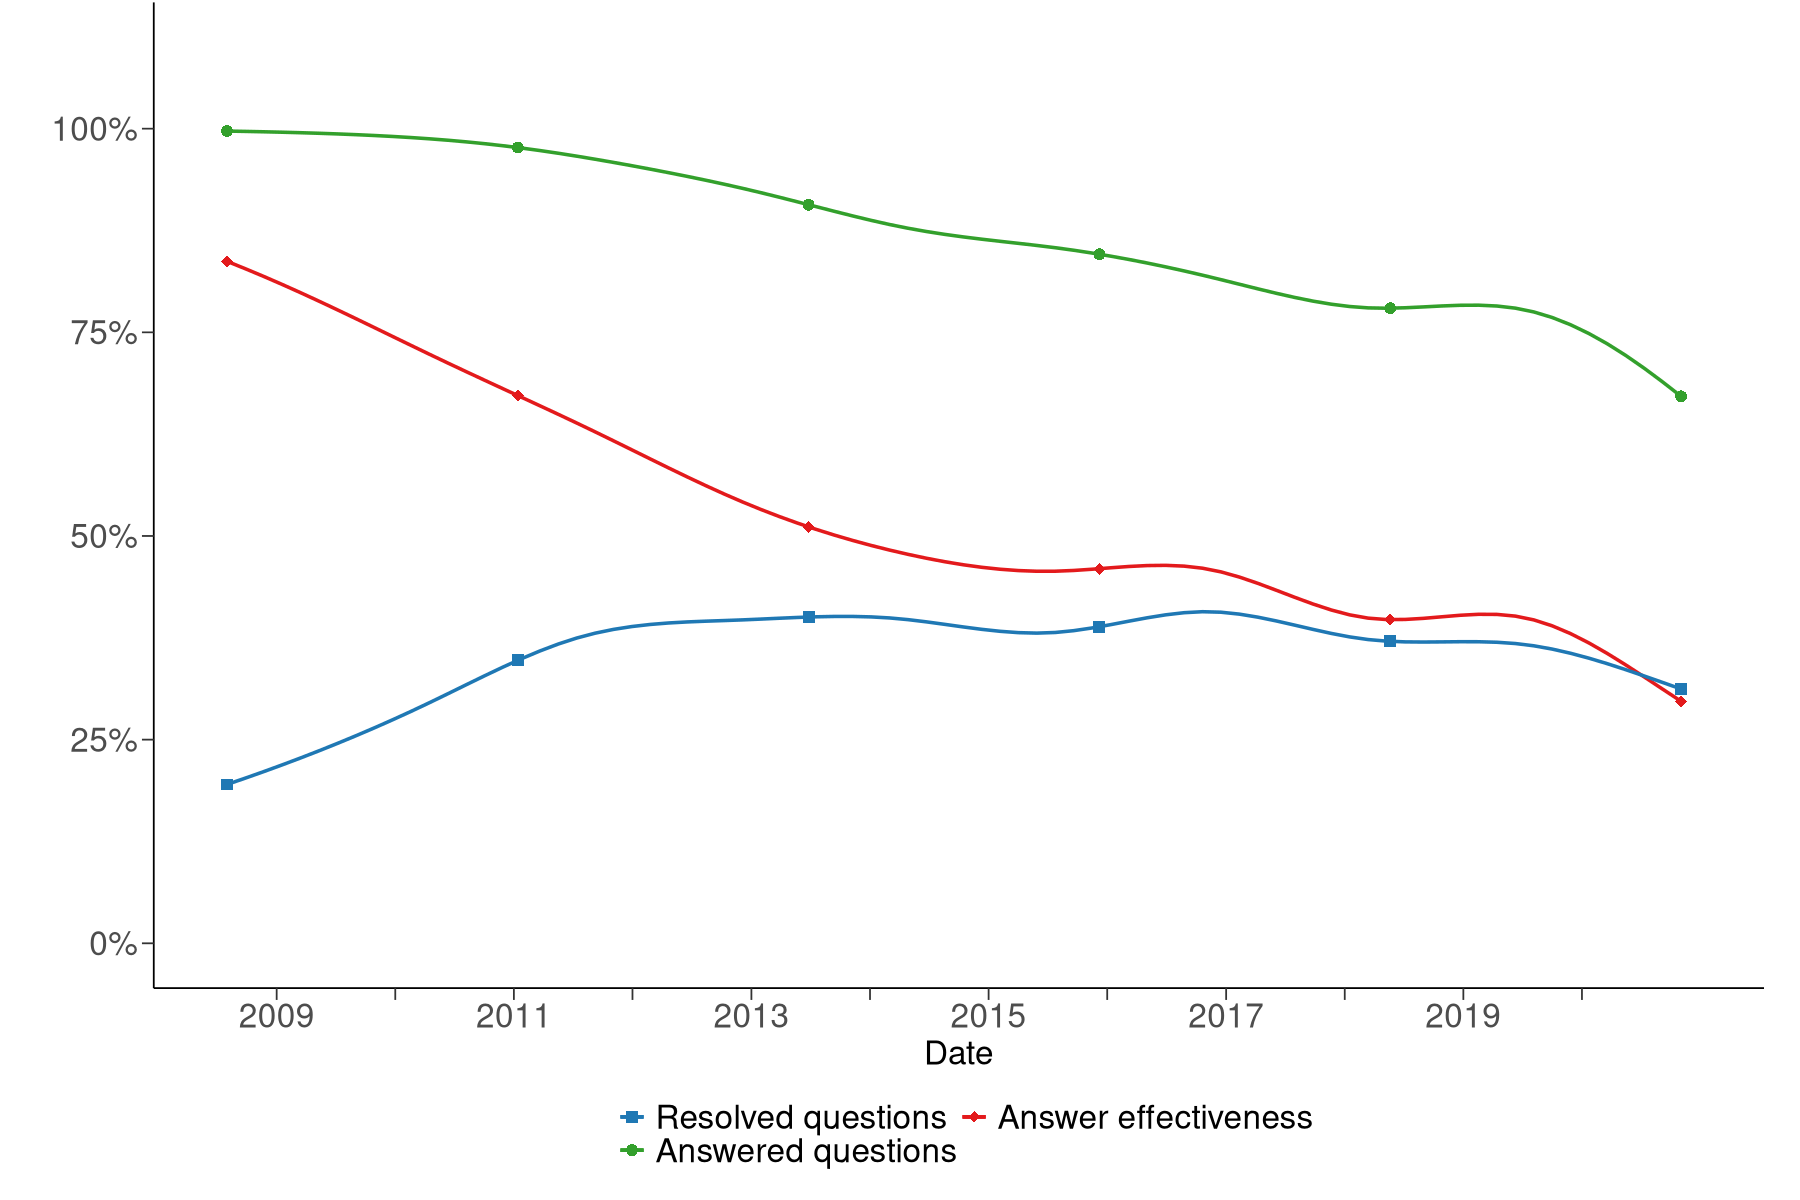

In [54]:
smooth_percentages(so, so$month_breaks) %>% 
save('figures/so_percentages.pdf')

In [55]:
# Decreases in percentages
so$percentages %>% 
  summarise(
    p_value_ans = cox.stuart.test(answered, 'left.sided')$p.value,
    p_value_res = cox.stuart.test(resolved, 'left.sided')$p.value,
    p_value_eff = cox.stuart.test(answer_effectiveness, 'left.sided')$p.value,
  )

p_value_ans,p_value_res,p_value_eff
<dbl>,<dbl>,<dbl>
4.235165e-22,2.528902e-17,0.4062943


In [56]:
so$percentages %>% 
  filter(answered > 0.8)

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2008-08-01,1.0000000,1.0000000,0.2500000
2009-01-01,1.0000000,1.0000000,0.2000000
2009-03-01,1.0000000,1.0000000,0.3750000
2009-05-01,1.0000000,0.0000000,0.5000000
2009-06-01,1.0000000,0.5000000,0.1153846
2009-07-01,1.0000000,1.0000000,0.1250000
2009-08-01,1.0000000,0.8000000,0.1818182
2009-09-01,1.0000000,0.5000000,0.3333333
2009-10-01,1.0000000,1.0000000,0.4000000


In [57]:
so$percentages %>% 
  filter(answered == min(answered))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2020-11-01,0.5930233,0.2494715,0.2867215


In [58]:
# Max and min answered percentages
so$percentages %>% 
  filter(answered == max(answered) |
         answered == min(answered))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2008-08-01,1.0000000,1.0000000,0.2500000
2009-01-01,1.0000000,1.0000000,0.2000000
2009-03-01,1.0000000,1.0000000,0.3750000
2009-05-01,1.0000000,0.0000000,0.5000000
2009-06-01,1.0000000,0.5000000,0.1153846
2009-07-01,1.0000000,1.0000000,0.1250000
2009-08-01,1.0000000,0.8000000,0.1818182
2009-09-01,1.0000000,0.5000000,0.3333333
2009-10-01,1.0000000,1.0000000,0.4000000


In [59]:
# Max and min resolved percentages
so$percentages %>% 
filter(resolved != 0 & resolved != 1) %>% 
  filter(resolved == max(resolved) |
         resolved == min(resolved))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2010-04-01,1.0000000,0.9000000,0.4761905
2020-11-01,0.5930233,0.2494715,0.2867215


### Gamedev

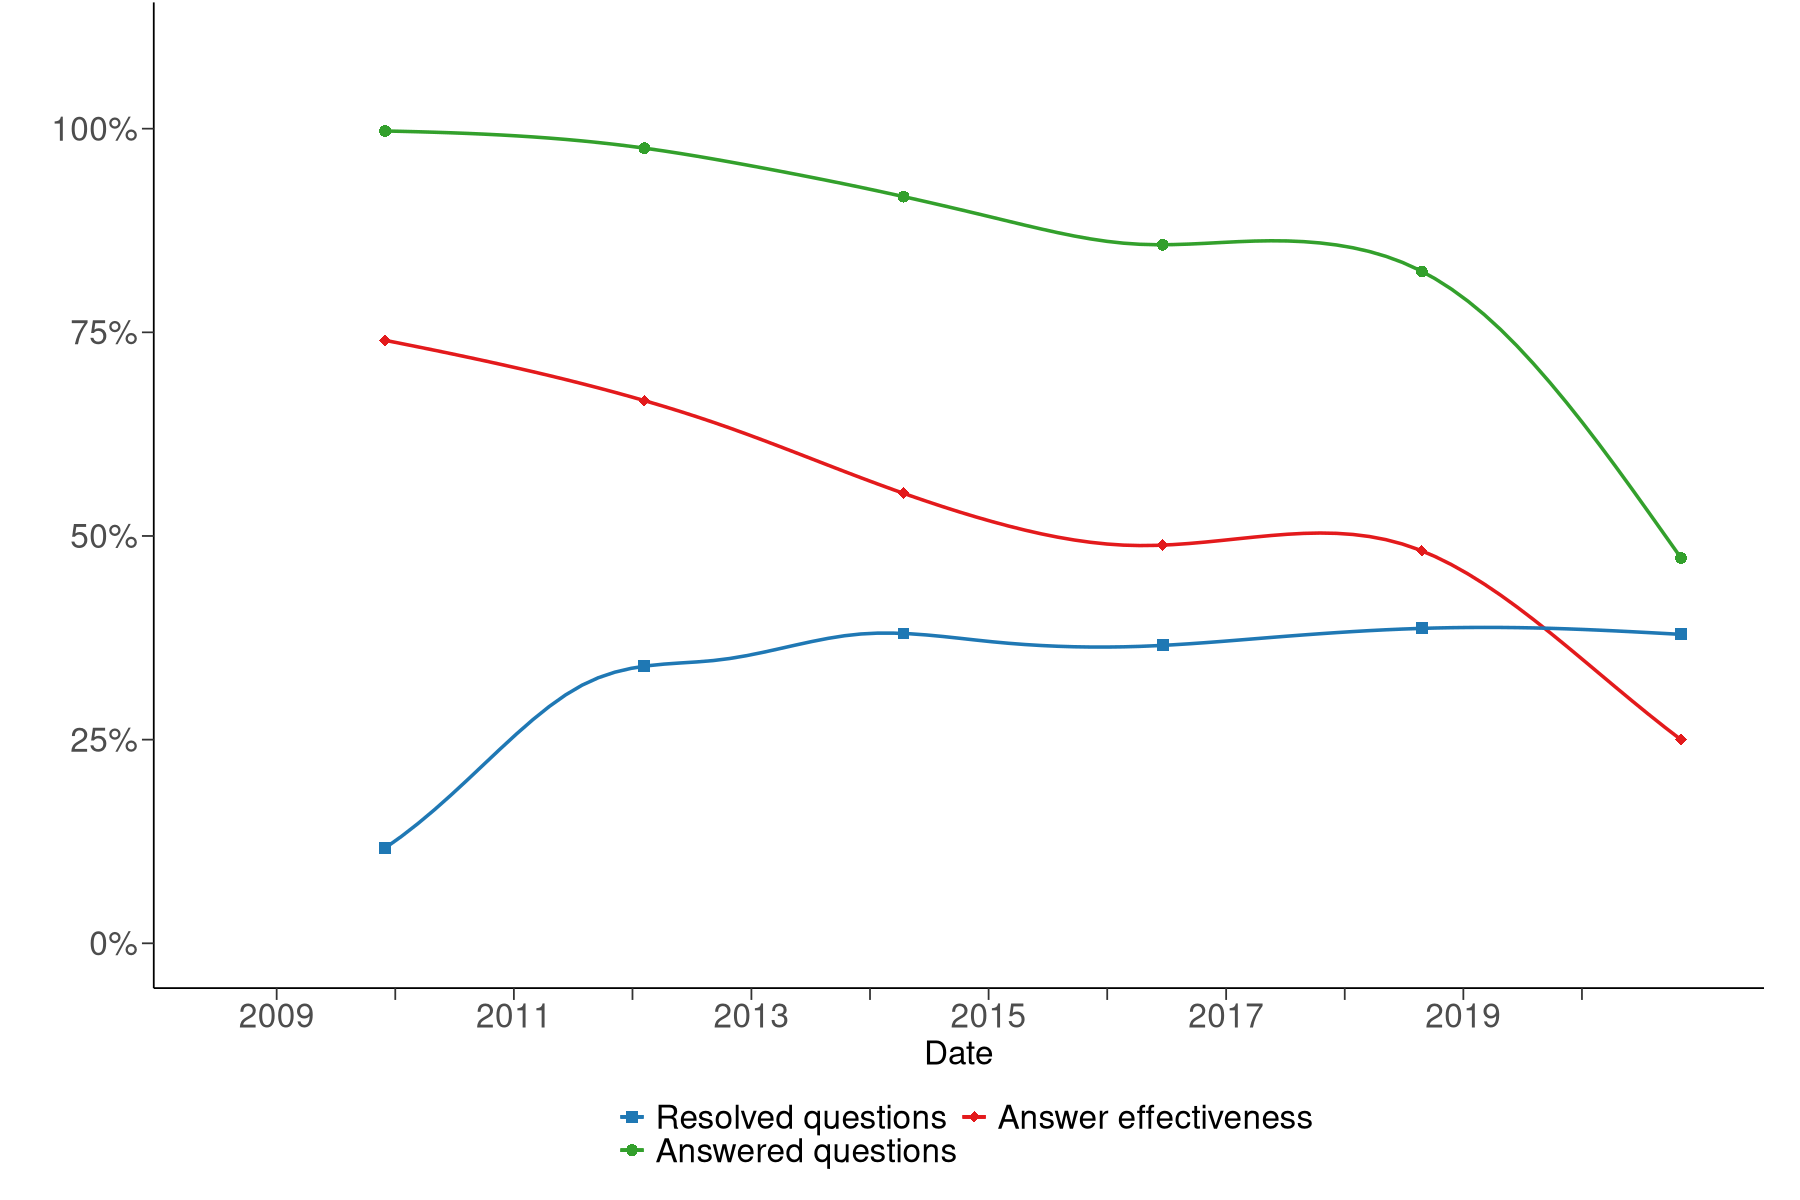

In [60]:
smooth_percentages(se, so$month_breaks) %>% 
save('figures/se_percentages.pdf')

In [61]:
# Decreases in percentages
se$percentages %>% 
  summarise(
    p_value_ans = cox.stuart.test(answered, 'left.sided')$p.value,
    p_value_res = cox.stuart.test(resolved, 'left.sided')$p.value,
    p_value_eff = cox.stuart.test(answer_effectiveness, 'left.sided')$p.value,
  )

p_value_ans,p_value_res,p_value_eff
<dbl>,<dbl>,<dbl>
1.084202e-19,1.084202e-19,0.9999415


In [62]:
se$percentages %>% 
  filter(answered > 0.8)

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2009-12-01,1.0000000,1.0000000,0.5000000
2010-07-01,1.0000000,0.7410714,0.1776266
2010-08-01,0.9921569,0.6745098,0.1566038
2010-09-01,0.9939759,0.7891566,0.2654691
2010-10-01,0.9953271,0.7616822,0.2652027
2010-11-01,0.9957983,0.6512605,0.2228571
2010-12-01,0.9862385,0.7155963,0.2812500
2011-01-01,0.9912664,0.7467249,0.2709360
2011-02-01,0.9870968,0.6516129,0.2624021


In [63]:
# Max and min answered percentages
se$percentages %>% 
  filter(answered == max(answered) |
         answered == min(answered))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2009-12-01,1.000000,1.0000000,0.5000000
2010-07-01,1.000000,0.7410714,0.1776266
2020-04-01,0.464455,0.2559242,0.4192308


In [64]:
# Max and min resolved percentages
se$percentages %>% 
  filter(resolved == max(resolved) |
         resolved == min(resolved))

post_month,answered,resolved,answer_effectiveness
<date>,<dbl>,<dbl>,<dbl>
2009-12-01,1.0000000,1.0000000,0.5000000
2020-09-01,0.4880546,0.2423208,0.3609756


## 1.3 Answers have become less effective throughout the years

### Unity

In [65]:
# Max and min answer effectiveness
unity$percentages %>% 
  filter(answer_effectiveness == max(answer_effectiveness) |
         answer_effectiveness == min(answer_effectiveness)) %>%
  select(post_month, answer_effectiveness)

post_month,answer_effectiveness
<date>,<dbl>
2010-02-01,0.5270758
2020-06-01,0.1801752


In [66]:
# Decreasing effectiveness
unity$percentages %>% 
  .$answer_effectiveness %>% 
  cox.stuart.test('left.sided')


	Cox Stuart test

data:  .
statistic = 0, n = 65, p-value < 2.2e-16
alternative hypothesis: decreasing trend


In [67]:
# Brief increase
unity$percentages %>%
  filter(post_month >= ymd('2012-02-01'), post_month <= ymd('2013-09-01')) %>% 
  .$answer_effectiveness %>% 
  cox.stuart.test('right.sided')


	Cox Stuart test

data:  .
statistic = 10, n = 10, p-value = 0.0009766
alternative hypothesis: increasing trend


### UE4

In [68]:
# Max and min answer effectiveness
ue4$percentages %>% 
  filter(answer_effectiveness == max(answer_effectiveness) |
         answer_effectiveness == min(answer_effectiveness)) %>%
  select(post_month, answer_effectiveness)

post_month,answer_effectiveness
<date>,<dbl>
2014-12-01,0.6677538
2020-07-01,0.2340628


In [69]:
# Increase between Mar/Dec 2014
ue4$percentages %>%
  filter(post_month >= ymd('2014-03-01'), post_month <= ymd('2014-12-01')) %>% 
  .$answer_effectiveness %>% 
  cox.stuart.test('right.sided')


	Cox Stuart test

data:  .
statistic = 5, n = 5, p-value = 0.03125
alternative hypothesis: increasing trend


In [70]:
# Decrease after Dec/2014
ue4$percentages %>% 
  filter(post_month > ymd('2014-12-01')) %>%
  .$answer_effectiveness %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 0, n = 33, p-value = 1.164e-10
alternative hypothesis: decreasing trend


### Stack Overflow

In [71]:
# Max and min answer effectiveness
so$percentages %>%
  filter(answer_effectiveness == max(answer_effectiveness) |
         answer_effectiveness == min(answer_effectiveness)) %>%
  select(post_month, answer_effectiveness)

post_month,answer_effectiveness
<date>,<dbl>
2009-06-01,0.1153846
2011-12-01,0.5154639


In [72]:
so$percentages %>%
  filter(post_month < ymd('2013-01-01')) %>% 
  .$answer_effectiveness %>% 
  cox.stuart.test('right.sided')


	Cox Stuart test

data:  .
statistic = 18, n = 23, p-value = 0.005311
alternative hypothesis: increasing trend


In [73]:
so$percentages %>% 
  filter(post_month >= ymd('2013-01-01') & post_month <= ymd('2017-09-01')) %>%
  .$answer_effectiveness %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 16, n = 28, p-value = 0.5716
alternative hypothesis: non randomness


In [74]:
so$percentages %>% 
  filter(post_month > ymd('2017-09-01')) %>%
  .$answer_effectiveness %>% 
  cox.stuart.test("left.sided")


	Cox Stuart test

data:  .
statistic = 4, n = 19, p-value = 0.009605
alternative hypothesis: decreasing trend


### Game dev

In [75]:
# Max and min answer effectiveness
se$percentages %>%
  filter(answer_effectiveness == max(answer_effectiveness) |
         answer_effectiveness == min(answer_effectiveness)) %>%
  select(post_month, answer_effectiveness)

post_month,answer_effectiveness
<date>,<dbl>
2009-12-01,0.5000000
2010-08-01,0.1566038


In [76]:
se$percentages %>%
  filter(post_month < ymd('2013-09-01')) %>% 
  .$answer_effectiveness %>% 
  cox.stuart.test('right.sided')


	Cox Stuart test

data:  .
statistic = 17, n = 19, p-value = 0.0003643
alternative hypothesis: increasing trend


In [77]:
# Decrease after Dec/2014
se$percentages %>% 
  filter(post_month >= ymd('2013-09-01')) %>%
  .$answer_effectiveness %>% 
  cox.stuart.test("two.sided")


	Cox Stuart test

data:  .
statistic = 26, n = 43, p-value = 0.2221
alternative hypothesis: non randomness


## 1.4 The  communities  grew  as  major  releases  occurred

In [78]:
analyzeReleases <- function(database) {
  # create daily counts of users and posts + 
  daily <- function(database) {
    posts <- database$posts %>% 
      group_by(post_date) %>% 
      summarise(posts = n()) %>%  
      ungroup
    
    users <- database$posts %>% 
      distinct(author_id, post_date) %>% 
      group_by(post_date) %>% 
      summarise(users = n()) %>% 
      ungroup
    
    posts %>% 
      inner_join(users, "post_date")
  }
  
  # wilcoxon test between n-day periods before/after the reference date
  w_test <- function(daily_stats, ref_date, col, n_days) {
    pre <- daily_stats %>% 
      filter(post_date < ref_date, post_date >= ref_date - days(n_days)) %>% 
      pull(col)
    
    pos <- daily_stats %>% 
      filter(post_date > ref_date, post_date <= ref_date + days(n_days)) %>% 
      pull(col)
    
    if (length(pre) == length(pos)) {
      wilcox.test(pre, pos, paired=TRUE, exact=FALSE)$p.value
    } else {
      1
    }
  }
  
  # median before reference date
  med_bef <- function(daily_stats, ref_date, col, n_days) {
    daily_stats %>% 
      filter(post_date < ref_date, post_date >= ref_date - days(n_days)) %>% 
      pull(col) %>% 
      median
  }
  
  # median after reference date
  med_aft <- function(daily_stats, ref_date, col, n_days) {
    daily_stats %>% 
      filter(post_date > ref_date, post_date <= ref_date + days(n_days)) %>% 
      pull(col) %>% 
      median
  } 
  
  # Cliffs delta between n-day periods before/after reference date
  delta <- function(daily_stats, ref_date, col, n_days) {
    pre <- daily_stats %>% 
      filter(post_date < ref_date, post_date >= ref_date - days(n_days)) %>% 
      pull(col)
    
    pos <- daily_stats %>% 
      filter(post_date > ref_date, post_date <= ref_date + days(n_days)) %>% 
      pull(col)
    
    if(length(pre) > 0) {
      cliff.delta(pre, pos)$estimate    
    } else {
      0
    }
  }
  
  apply_tests <- function(daily_stats, n_days) {
    database$releases %>% 
      group_by(release, date) %>% 
      mutate(
        posts_p_value = w_test(daily_stats, date, 'posts', n_days),
        users_p_value = w_test(daily_stats, date, 'users', n_days),
        posts_med_bef = med_bef(daily_stats, date, 'posts', n_days),
        posts_med_aft = med_aft(daily_stats, date, 'posts', n_days),
        delta_posts   = delta(daily_stats, date, 'posts', n_days),
        increase_posts= posts_med_aft/posts_med_bef-1,
        users_med_bef = med_bef(daily_stats, date, 'users', n_days),
        users_med_aft = med_aft(daily_stats, date, 'users', n_days),
        increase_users= users_med_aft/users_med_bef-1,
        delta_users   = delta(daily_stats, date, 'users', n_days),
        ) %>% 
      ungroup()
  }
  
  database %>%
    daily %>%
    apply_tests(30) %>% 
    filter(posts_p_value <= 0.05 | users_p_value <= 0.05)
}

In [79]:
analyzeReleases(ue4)

Warning message in cliff.delta.default(pre, pos):
“The samples are fully disjoint, using approximate Confidence Interval estimation”


release,date,num,posts_p_value,users_p_value,posts_med_bef,posts_med_aft,delta_posts,increase_posts,users_med_bef,users_med_aft,increase_users,delta_users
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Free engine release,2015-03-02,13,0.0001417224,5.071998e-05,456.5,709,-0.7533333,0.5531216,212,318.5,0.5023585,-0.7888889


In [80]:
analyzeReleases(unity)

release,date,num,posts_p_value,users_p_value,posts_med_bef,posts_med_aft,delta_posts,increase_posts,users_med_bef,users_med_aft,increase_users,delta_users
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asset store release,2014-03-19,2,1.563266e-05,0.018006515,728,592.5,0.6533333,-0.1861264,306.5,279.5,-0.08809135,0.3711111
v3.0,2010-10-15,3,2.762407e-03,0.003725449,146,197.5,-0.5166667,0.3527397,76.5,98.5,0.28758170,-0.5277778
v4.0,2012-11-13,5,1.279847e-01,0.007965557,421,469.0,-0.3133333,0.1140143,175.5,206.0,0.17378917,-0.5055556


## 1.5 The  percentages  of  answered  and  resolved  questions went  down  as  the  community  grew

### Unity

In [81]:
# During growth
# Strong negative correlations between (n_users, n_posts) and (answered, resolved)
unity$percentages %>%
  inner_join(unity$aupm, "post_month") %>% 
  inner_join(
    unity$posts %>% 
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month < ymd('2014-03-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.8390351,0.5867821,-0.8958565,-0.8529201
resolved,0.8390351,1.0000000,0.8103850,-0.7304898,-0.7436437
answer_effectiveness,0.5867821,0.8103850,1.0000000,-0.4022104,-0.4398755
n_users,-0.8958565,-0.7304898,-0.4022104,1.0000000,0.9718183
n_posts,-0.8529201,-0.7436437,-0.4398755,0.9718183,1.0000000


In [82]:
# After growth
# Moderate positive correlation between n_users and (answered, resolved)
# Strong positive correlation between n_posts and (answered, resolved)
unity$percentages %>%
  inner_join(unity$aupm, "post_month") %>% 
  inner_join(
    unity$posts %>%  
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month >= ymd('2014-03-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.9595142,0.8467554,0.4418685,0.8943632
resolved,0.9595142,1.0000000,0.9337686,0.3689266,0.8827771
answer_effectiveness,0.8467554,0.9337686,1.0000000,0.3836681,0.8419993
n_users,0.4418685,0.3689266,0.3836681,1.0000000,0.7166433
n_posts,0.8943632,0.8827771,0.8419993,0.7166433,1.0000000


### UE4

In [83]:
# During growth
# Moderate negative correlations between (n_users, n_posts) and (answered, resolved)
ue4$percentages %>%
  inner_join(ue4$aupm, "post_month") %>% 
  inner_join(
    ue4$posts %>% 
      filter(author_id!="61") %>% # remove archive (not a real user)
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month < ymd('2015-04-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.9540761,-0.48841200,-0.61765353,-0.55894155
resolved,0.9540761,1.0000000,-0.27450447,-0.67044762,-0.65440501
answer_effectiveness,-0.4884120,-0.2745045,1.00000000,0.04800658,-0.02490095
n_users,-0.6176535,-0.6704476,0.04800658,1.00000000,0.97222477
n_posts,-0.5589416,-0.6544050,-0.02490095,0.97222477,1.00000000


In [84]:
# After growth
# Moderate positive correlation between n_users and (answered, resolved)
# Strong positive correlation between n_posts and (answered, resolved)
ue4$percentages %>%
  inner_join(ue4$aupm, "post_month") %>% 
  inner_join(
    ue4$posts %>% 
      filter(author_id!="61") %>% # remove archive (not a real user)
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month >= ymd('2015-04-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.9825972,0.9530259,0.6509590,0.9267243
resolved,0.9825972,1.0000000,0.9826722,0.6016121,0.9110281
answer_effectiveness,0.9530259,0.9826722,1.0000000,0.5335148,0.8766403
n_users,0.6509590,0.6016121,0.5335148,1.0000000,0.8237629
n_posts,0.9267243,0.9110281,0.8766403,0.8237629,1.0000000


### Stack Overflow

In [85]:
so$percentages %>%
  inner_join(so$aupm, "post_month") %>% 
  inner_join(
    so$posts %>% 
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month <= ymd('2016-05-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.6359721,-0.3726732,-0.8875202,-0.8323760
resolved,0.6359721,1.0000000,-0.2866310,-0.5827462,-0.5212383
answer_effectiveness,-0.3726732,-0.2866310,1.0000000,0.3456195,0.3063744
n_users,-0.8875202,-0.5827462,0.3456195,1.0000000,0.9702475
n_posts,-0.8323760,-0.5212383,0.3063744,0.9702475,1.0000000


In [86]:
so$percentages %>%
  inner_join(so$aupm, "post_month") %>% 
  inner_join(
    so$posts %>% 
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month > ymd('2016-05-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.00000000,0.88301599,0.6139476,-0.4659884,0.02454735
resolved,0.88301599,1.00000000,0.8527601,-0.5527336,-0.02216681
answer_effectiveness,0.61394765,0.85276012,1.0000000,-0.5877115,-0.12714791
n_users,-0.46598845,-0.55273364,-0.5877115,1.0000000,0.71134548
n_posts,0.02454735,-0.02216681,-0.1271479,0.7113455,1.00000000


### Game Dev

In [87]:
se$percentages %>%
  inner_join(se$aupm, "post_month") %>% 
  inner_join(
    se$posts %>% 
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month <= ymd('2013-02-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.6125096,-0.4246384,-0.8607369,-0.7756350
resolved,0.6125096,1.0000000,0.2079998,-0.7849999,-0.7724386
answer_effectiveness,-0.4246384,0.2079998,1.0000000,0.2574427,0.1248110
n_users,-0.8607369,-0.7849999,0.2574427,1.0000000,0.9517873
n_posts,-0.7756350,-0.7724386,0.1248110,0.9517873,1.0000000


In [88]:
se$percentages %>%
  inner_join(se$aupm, "post_month") %>% 
  inner_join(
    se$posts %>% 
      group_by(post_month) %>% 
      summarise(n_posts = n()) %>% 
      ungroup,
    "post_month") %>% 
  filter(post_month > ymd('2013-02-01')) %>% 
  select(-post_month) %>% 
  cor

,answered,resolved,answer_effectiveness,n_users,n_posts
answered,1.0000000,0.95085063,-0.10134082,0.6597642,0.6366370
resolved,0.9508506,1.00000000,0.08718027,0.5972222,0.6236548
answer_effectiveness,-0.1013408,0.08718027,1.00000000,-0.2586736,-0.1806642
n_users,0.6597642,0.59722225,-0.25867361,1.0000000,0.9410861
n_posts,0.6366370,0.62365477,-0.18066420,0.9410861,1.0000000


## 1.6 Experienced users increased the percentage of answered and resolved questions

In [89]:
# Calc stats for a group of users (in table t)
user_group_stats <- function(database, t) {
  other_users_eff <- database$posts %>% 
    distinct(author_id) %>% 
    anti_join(t, 'author_id') %>% 
    inner_join(
      database$answers,
      "author_id"
    ) %>% 
    summarise(
      eff = mean(is_accepted)) %>% 
    pull(eff)
  
  database$answers %>% 
    inner_join(
      t,
      "author_id"
    ) %>% 
    summarise(
      n = t %>% nrow,
      min_xp = min(exp),
      max_xp = max(exp),
      questions_answered = n_distinct(question_id),
      questions_answered_all_users = database$questions %>% filter(n_answers > 0) %>% nrow,
      percentage_answered = questions_answered/questions_answered_all_users,
      questions_resolved = n_distinct(question_id[is_accepted>0]),
      questions_resolved_all_users = database$questions %>% filter(is_resolved > 0) %>% nrow,
      percentage_resolved = questions_resolved/questions_resolved_all_users,
      effectiveness = mean(is_accepted),
      effectiveness_other_users = other_users_eff,
      ) %>% 
    pivot_longer(names(.)) %>% 
    mutate(value = format(value, digits=2, scientific=F))
}

# Calc stats for experienced users (users with top 1% experience)
experienced_users_stats <- function(database) {
  experienced_users <- database$user_experience %>% 
    filter(author_id != '61') %>% # remove archive (not a real user)
    group_by(author_id) %>% 
    summarise(exp = max(total_posts)) %>% 
    ungroup() %>% 
    mutate(rank = min_rank(desc(exp))) %>% 
    filter(rank <= 0.01*n()) %>% 
    distinct(author_id, .keep_all = T)
  
  user_group_stats(database, experienced_users)
}

# Calc stats for staff members
staff_members_stats <- function(database) {
  staff_members <- database$user_experience %>% 
  filter(author_id != '61') %>% 
  group_by(author_id) %>% 
  summarise(exp = max(total_posts)) %>% 
  ungroup() %>% 
  mutate(rank = min_rank(desc(exp))) %>% 
  filter(rank <= 0.01*n()) %>% 
  distinct(author_id, .keep_all = T)  %>% 
  inner_join(database$users %>%
             filter(is_staff==1), c('author_id'='id')) %>% 
  select(author_id, exp)
  
  user_group_stats(database, staff_members)
}

### Unity

In [90]:
experienced_users_stats(unity)

name,value
<chr>,<chr>
n,1875.00
min_xp,83.00
max_xp,18508.00
questions_answered,149794.00
questions_answered_all_users,235900.00
percentage_answered,0.63
questions_resolved,68588.00
questions_resolved_all_users,103723.00
percentage_resolved,0.66


In [91]:
staff_members_stats(unity)

name,value
<chr>,<chr>
n,23.000
min_xp,84.000
max_xp,8004.000
questions_answered,6655.000
questions_answered_all_users,235900.000
percentage_answered,0.028
questions_resolved,2397.000
questions_resolved_all_users,103723.000
percentage_resolved,0.023


### UE4

In [92]:
experienced_users_stats(ue4)

name,value
<chr>,<chr>
n,802.00
min_xp,104.00
max_xp,8231.00
questions_answered,85667.00
questions_answered_all_users,128100.00
percentage_answered,0.67
questions_resolved,54833.00
questions_resolved_all_users,80749.00
percentage_resolved,0.68


In [93]:
staff_members_stats(ue4)

name,value
<chr>,<chr>
n,78.00
min_xp,106.00
max_xp,8231.00
questions_answered,39215.00
questions_answered_all_users,128100.00
percentage_answered,0.31
questions_resolved,32671.00
questions_resolved_all_users,80749.00
percentage_resolved,0.40


### Stack overflow

In [94]:
experienced_users_stats(so)

name,value
<chr>,<chr>
n,664.00
min_xp,52.00
max_xp,10730.00
questions_answered,22148.00
questions_answered_all_users,51994.00
percentage_answered,0.43
questions_resolved,11815.00
questions_resolved_all_users,27473.00
percentage_resolved,0.43


### Game dev

In [95]:
experienced_users_stats(se)

name,value
<chr>,<chr>
n,337.00
min_xp,115.00
max_xp,13448.00
questions_answered,26157.00
questions_answered_all_users,43799.00
percentage_answered,0.60
questions_resolved,14484.00
questions_resolved_all_users,26806.00
percentage_resolved,0.54


## 1.7 Experienced  users  stopped  contributing  to  the  communities

### Unity

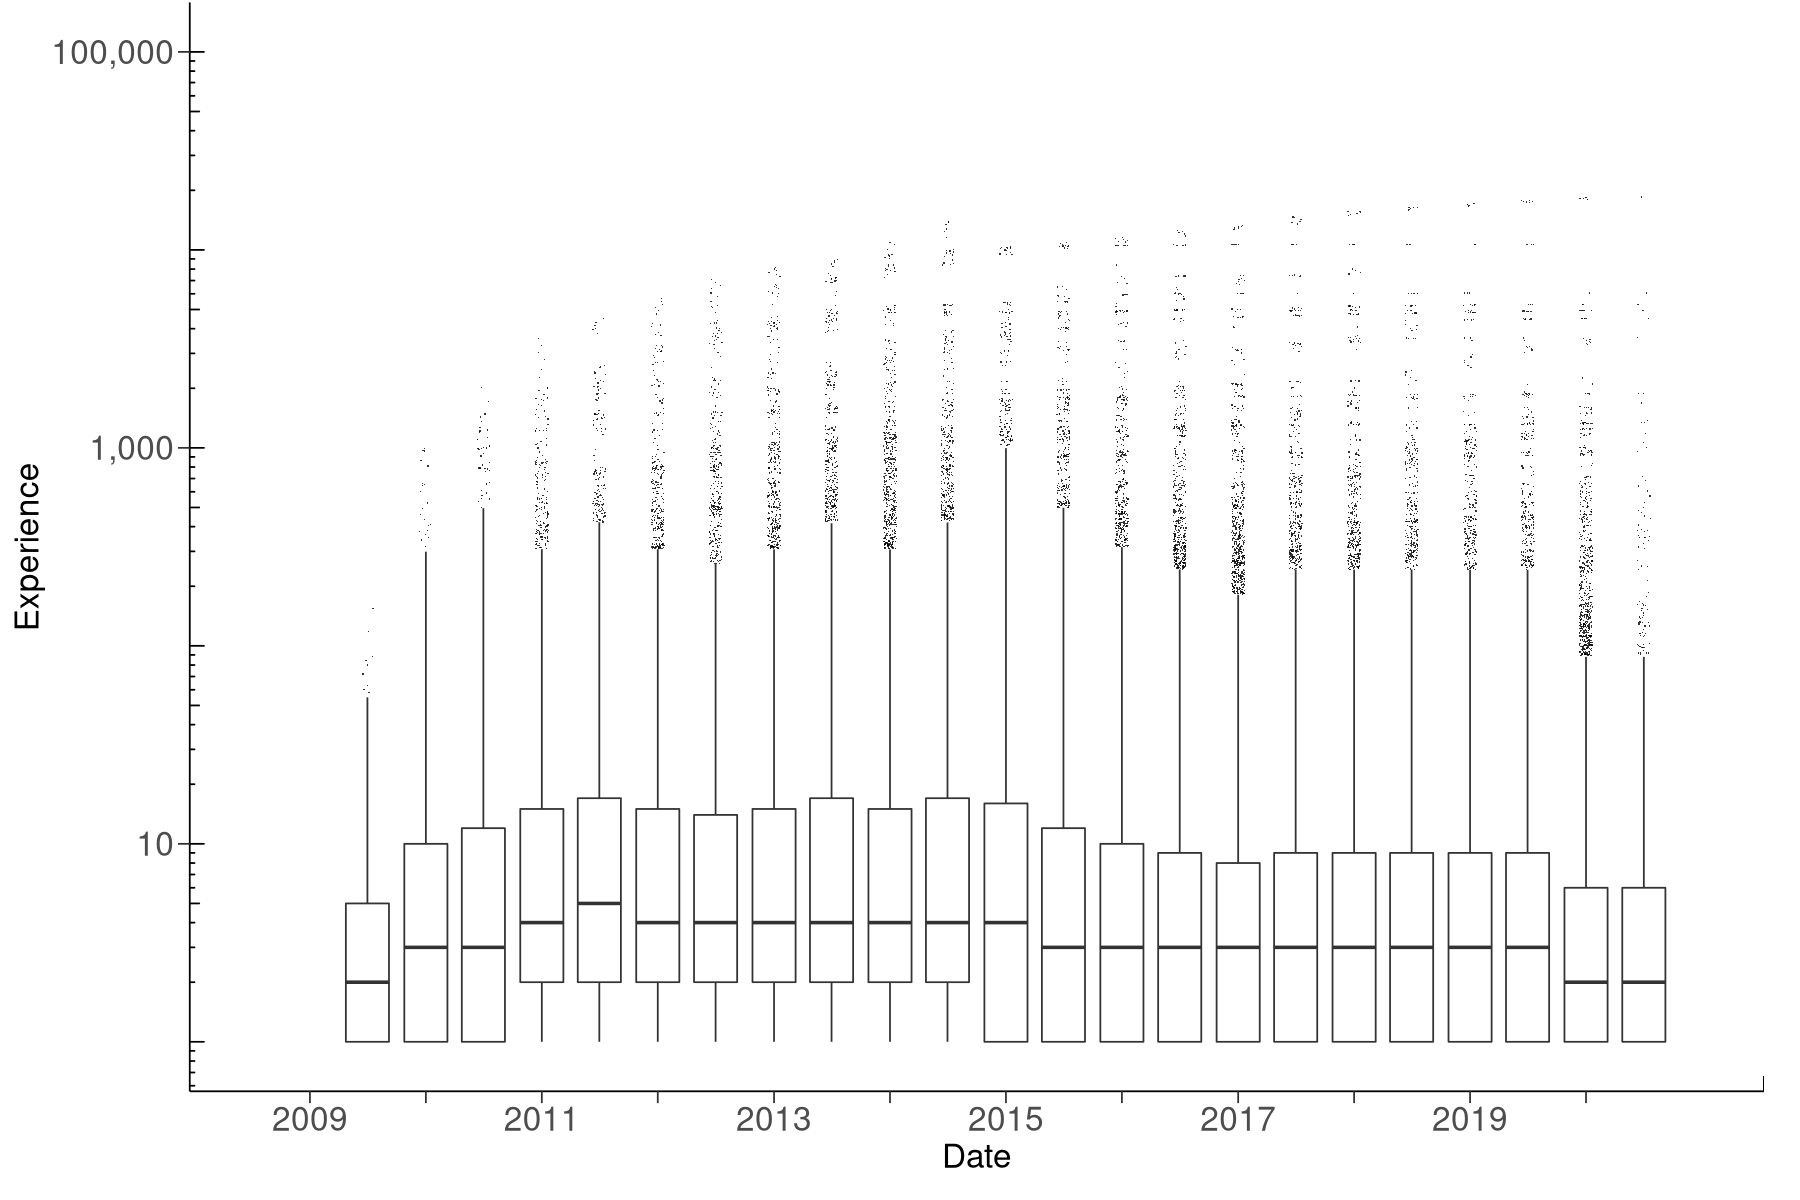

In [96]:
boxplot_user_experience(unity, so$month_breaks) %>% 
save('figures/unity_experience.pdf')

### UE4

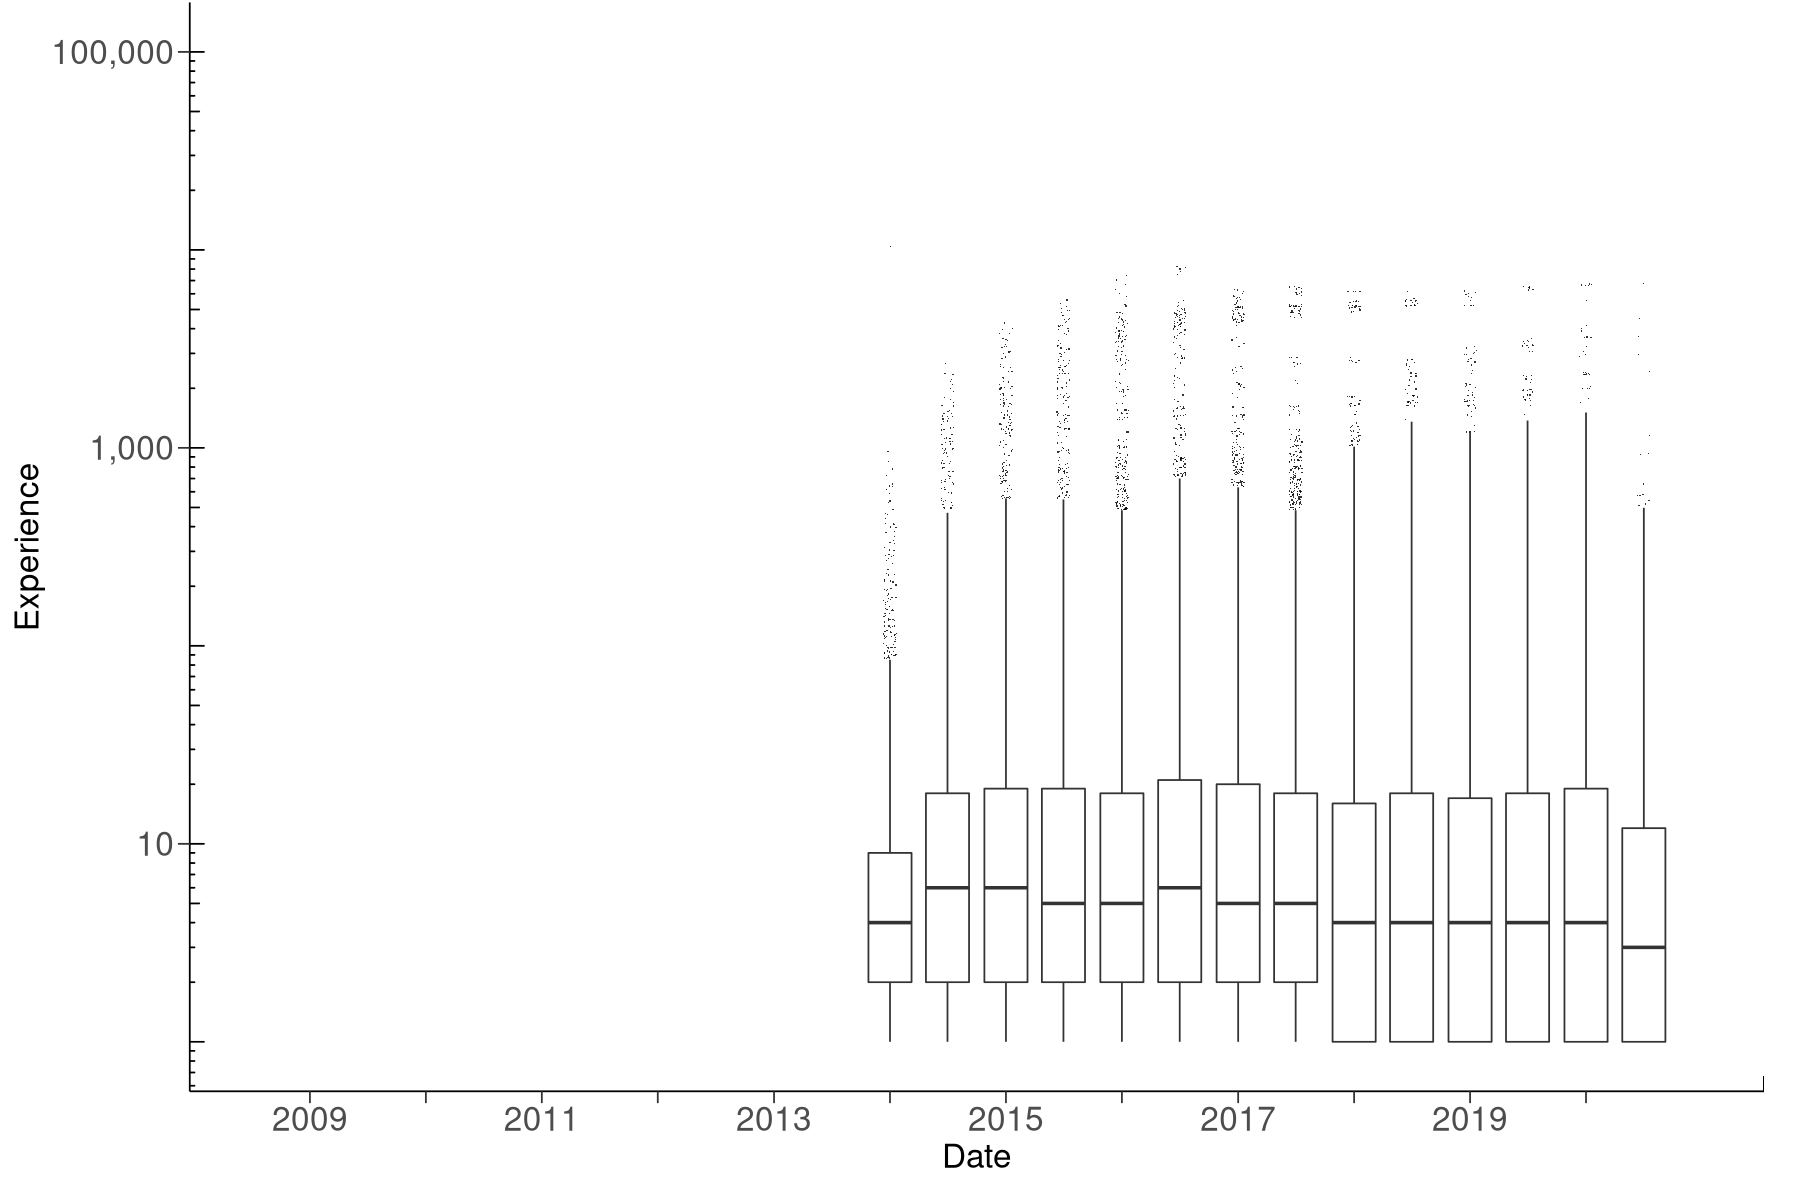

In [97]:
boxplot_user_experience(ue4, so$month_breaks) %>% 
save('figures/ue4_experience.pdf')

### Stack Overflow

Warning message:
“Removed 7 rows containing missing values (stat_boxplot).”
Warning message:
“Removed 7 rows containing missing values (stat_boxplot).”


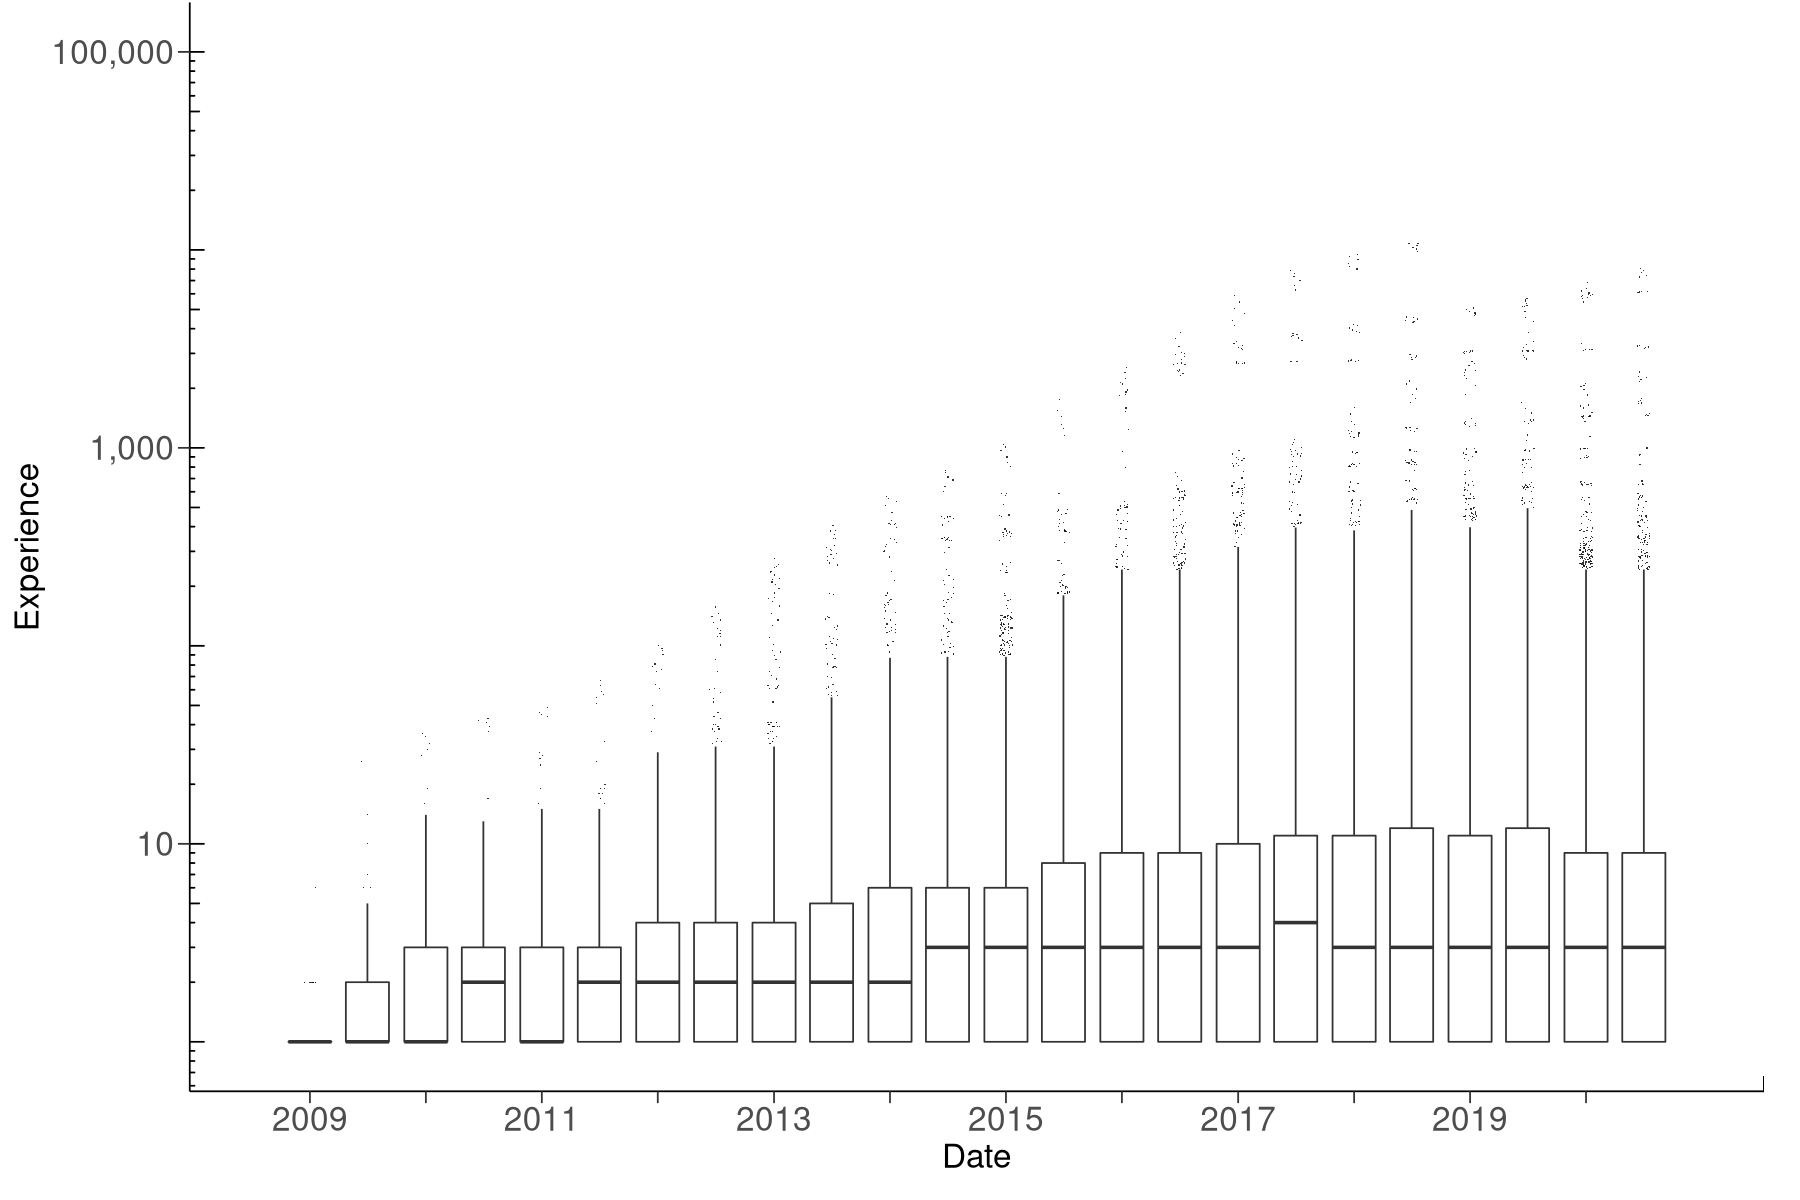

In [98]:
boxplot_user_experience(so, so$month_breaks) %>% 
save('figures/so_experience.pdf')

### Game dev

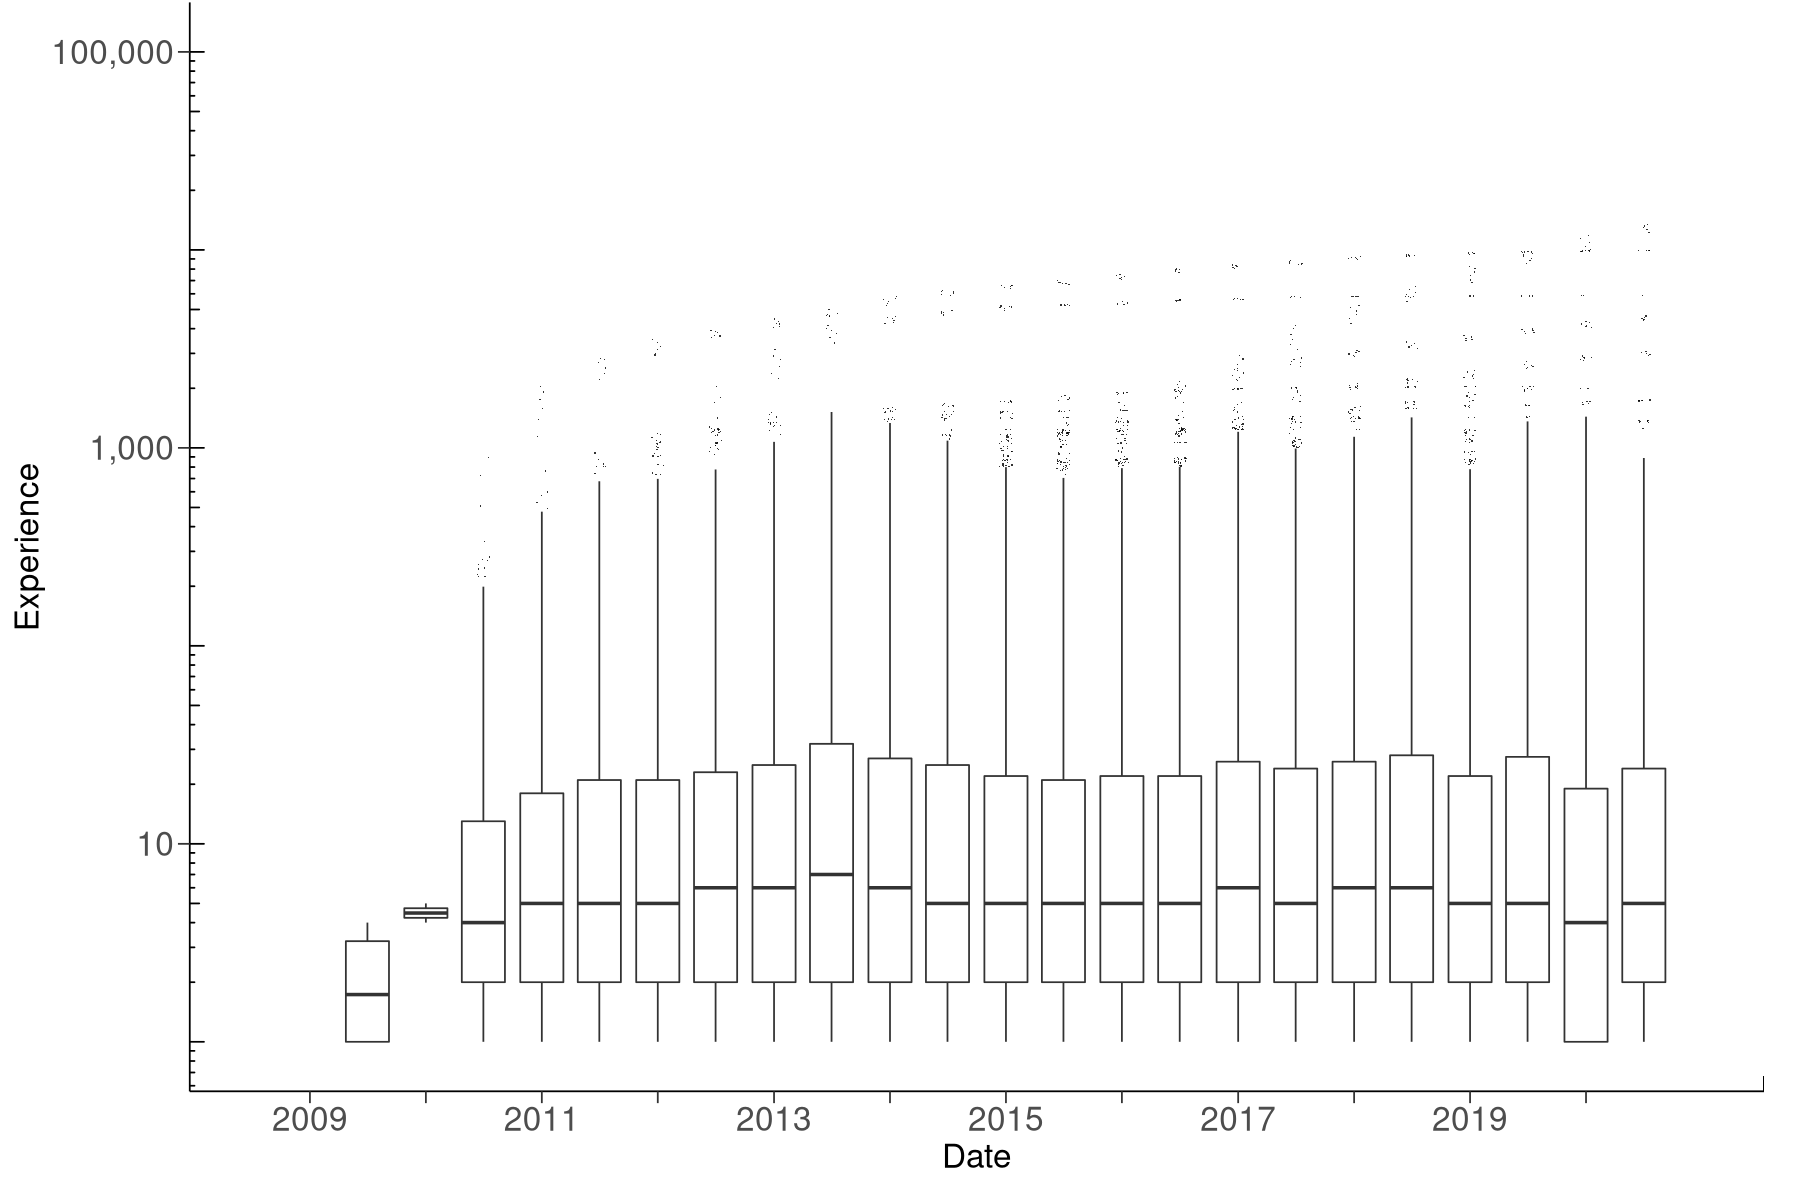

In [99]:
boxplot_user_experience(se, so$month_breaks) %>% 
save('figures/se_experience.pdf')

# RQ2

## 2.1 Most of the topics discussed on the studied Q&A websites are specific to game development.

In [100]:
unity$posts %>% 
  filter(!is.na(category)) %>% 
  group_by(category) %>% 
  count %>% 
  ungroup %>% 
  mutate(p = n/sum(n))

category,n,p
<chr>,<int>,<dbl>
,2603,0.001885672
"Bugs, crashes, and errors",375248,0.271838077
Game development,795506,0.576282409
General software development,207053,0.149993842


In [101]:
ue4$posts %>% 
  filter(!is.na(category)) %>% 
  group_by(category) %>% 
  count %>% 
  ungroup %>% 
  mutate(p = n/sum(n))

category,n,p
<chr>,<int>,<dbl>
,13163,0.01718181
"Bugs, crashes, and errors",233383,0.30463738
Game development,423439,0.55271955
General software development,96116,0.12546126


In [102]:
so$posts %>% 
  filter(!is.na(category)) %>% 
  group_by(category) %>% 
  count %>% 
  ungroup %>% 
  mutate(p = n/sum(n))

category,n,p
<chr>,<int>,<dbl>
,440,0.001201562
Game development,232702,0.635467926
General software development,133048,0.363330511


In [103]:
se$posts %>% 
  filter(!is.na(category)) %>% 
  group_by(category) %>% 
  count %>% 
  ungroup %>% 
  mutate(p = n/sum(n))

category,n,p
<chr>,<int>,<dbl>
,773,0.002283604
Game development,215635,0.637031019
General software development,122092,0.360685377


## 2.2 The distributions of topics show no statistically significant difference between the websites.

In [104]:
chisq.test(
    unity$posts %>% 
        filter(!is.na(topic_label)) %>% 
        group_by(topic_label) %>% 
        summarise(n = n()) %>% 
        ungroup %>% 
        arrange(topic_label) %>% 
        .$n,
    ue4$posts %>% 
        filter(!is.na(topic_label)) %>% 
        group_by(topic_label) %>% 
        summarise(n = n()) %>% 
        ungroup %>% 
        arrange(topic_label) %>% 
        .$n)

Warning message in chisq.test(unity$posts %>% filter(!is.na(topic_label)) %>% group_by(topic_label) %>% :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  unity$posts %>% filter(!is.na(topic_label)) %>% group_by(topic_label) %>% 
    summarise(n = n()) %>% ungroup %>% arrange(topic_label) %>% 
    .$n and ue4$posts %>% filter(!is.na(topic_label)) %>% group_by(topic_label) %>% 
    summarise(n = n()) %>% ungroup %>% arrange(topic_label) %>% 
    .$n
X-squared = 756, df = 729, p-value = 0.237


In [105]:
chisq.test(
    se$posts %>% 
        filter(!is.na(topic_label)) %>% 
        group_by(topic_label) %>% 
        summarise(n = n()) %>% 
        ungroup %>% 
        arrange(topic_label) %>% 
        .$n,
    so$posts %>% 
        filter(!is.na(topic_label)) %>% 
        group_by(topic_label) %>% 
        summarise(n = n()) %>% 
        ungroup %>% 
        arrange(topic_label) %>% 
        .$n)

Warning message in chisq.test(se$posts %>% filter(!is.na(topic_label)) %>% group_by(topic_label) %>% :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  se$posts %>% filter(!is.na(topic_label)) %>% group_by(topic_label) %>% 
    summarise(n = n()) %>% ungroup %>% arrange(topic_label) %>% 
    .$n and so$posts %>% filter(!is.na(topic_label)) %>% group_by(topic_label) %>% 
    summarise(n = n()) %>% ungroup %>% arrange(topic_label) %>% 
    .$n
X-squared = 650, df = 625, p-value = 0.2368


## 2.3 Bug reports was the most discussed topic on Unity Answers and the UE4 AnswerHub.
## 2.4 Game developers discussed different aspects of game development.
## 2.5 Object-oriented programming was one of the most popular topics on Stack Overflow and the Game Development Stack Exchange.

In [106]:
topic_dist <- function(tibble) {
    colors <- c("#F8766D", "#00BA38", "#619CFF")
    names(colors) <- c("General software development", "Bugs, crashes, and errors", "Game development")
    
    tibble %>% 
        mutate(topic_label = fct_recode(topic_label, c('Obj. Oriented Prog.' = 'Object Oriented Programming'))) %>% 
        filter(!is.na(topic)) %>% 
        ggplot(aes(y=topic_label, x=(..count..)/sum(..count..), fill=category)) +
        geom_bar() +
        scale_x_continuous(position="top", labels = scales::percent_format(accuracy = 1), limits=c(0, 0.3)) +
        default_theme() +
        theme(legend.position = c(0.6, 0.1),
            axis.text.x=element_text( size=25,family=""),
            axis.text.y=element_text( size=25,family=""),
            axis.title.x=element_text(size=25,family=""),
            axis.title.y=element_text(size=25,family="")) +
        scale_fill_manual(values=colors) +
        labs(y="", x="Percentage of posts", fill="") +
        guides(fill=guide_legend(ncol=1))
}

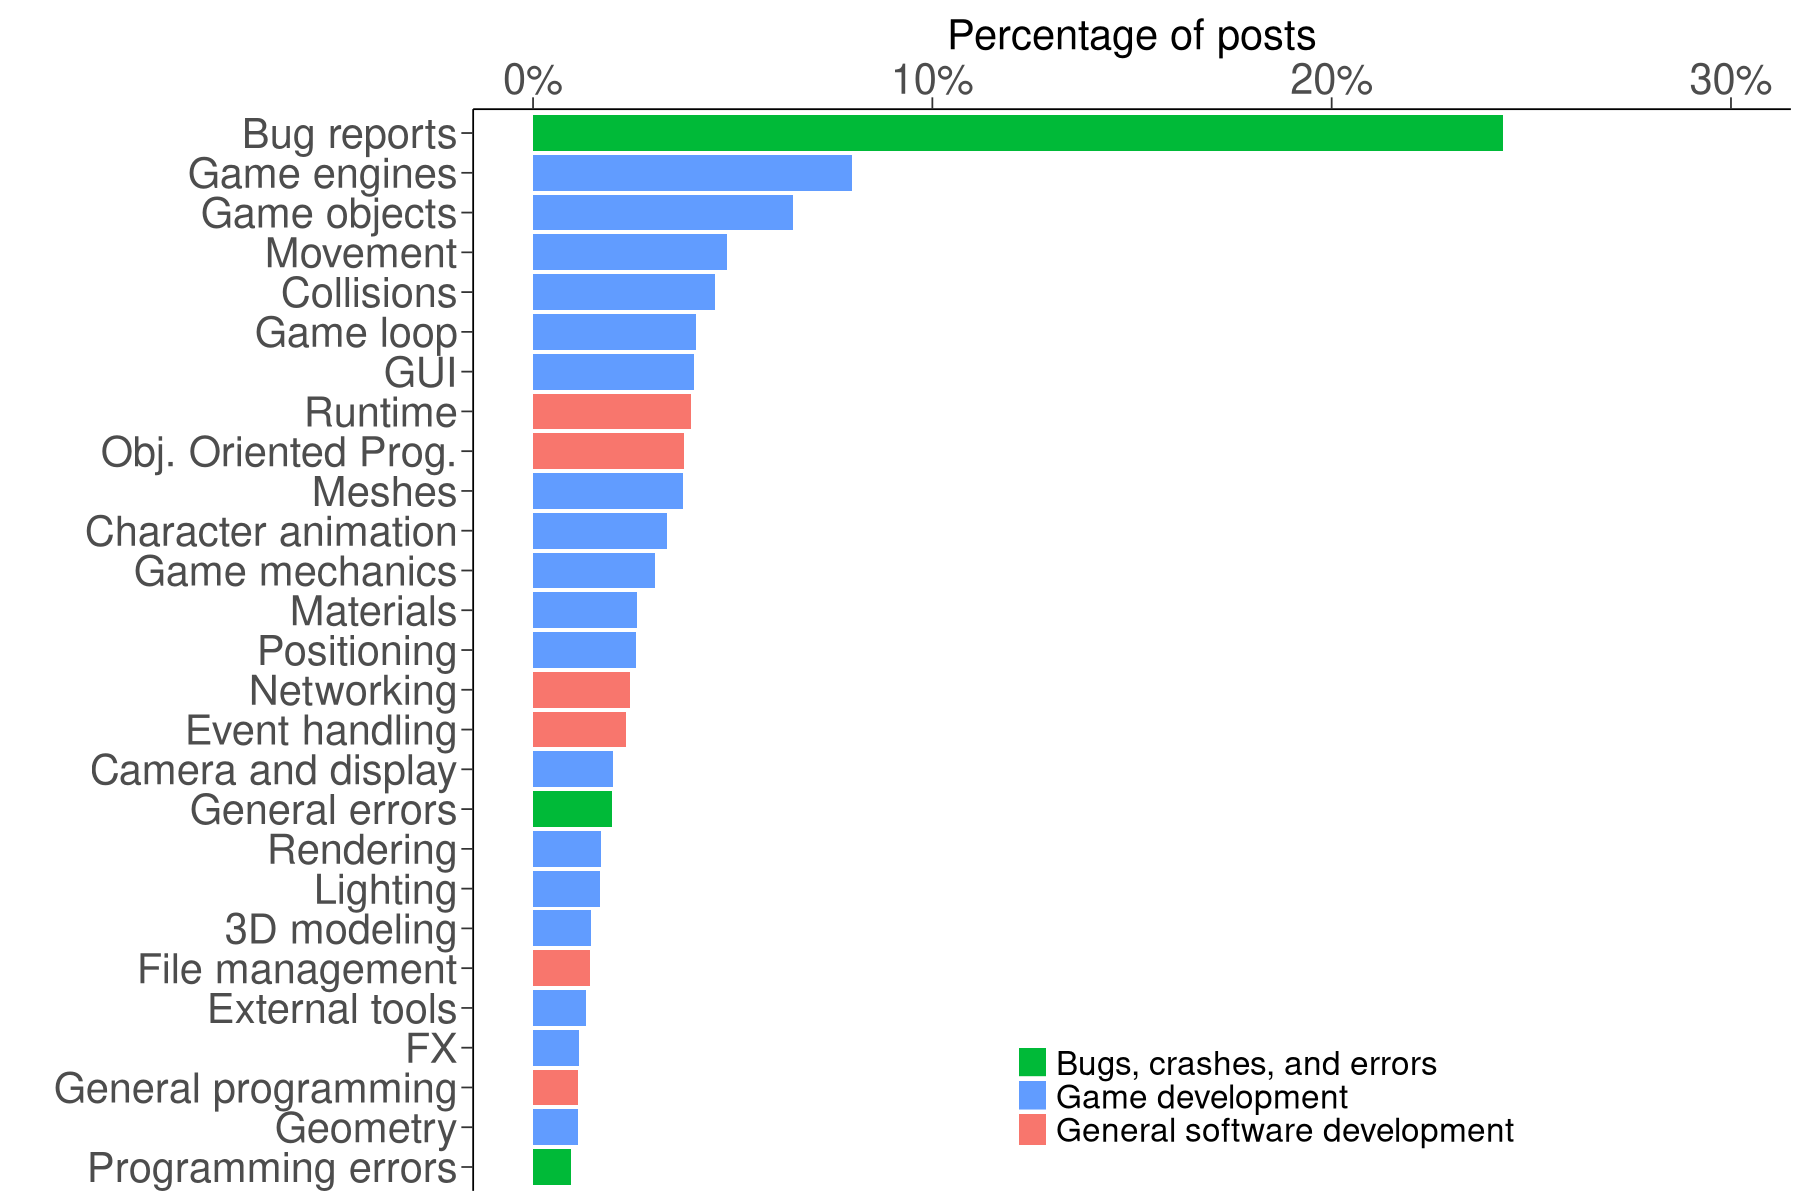

In [107]:
unity$posts %>% 
    topic_dist() %>% 
    save('figures/unity_topic_dist.pdf', w=3000, h=3000)

In [108]:
unity$posts %>% 
filter(!is.na(topic_label)) %>% 
group_by(topic_label) %>% 
summarise(n = n()) %>% 
ungroup %>% 
mutate(p = n/sum(n)*100) %>% 
arrange(desc(p))

topic_label,n,p
<fct>,<int>,<dbl>
Bug reports,334839,24.2564890
Game engines,110131,7.9781369
Game objects,89528,6.4856093
Movement,66766,4.8366790
Collisions,62646,4.5382169
Game loop,56116,4.0651690
GUI,55674,4.0331496
Runtime,54471,3.9460016
Object Oriented Programming,51957,3.7638817


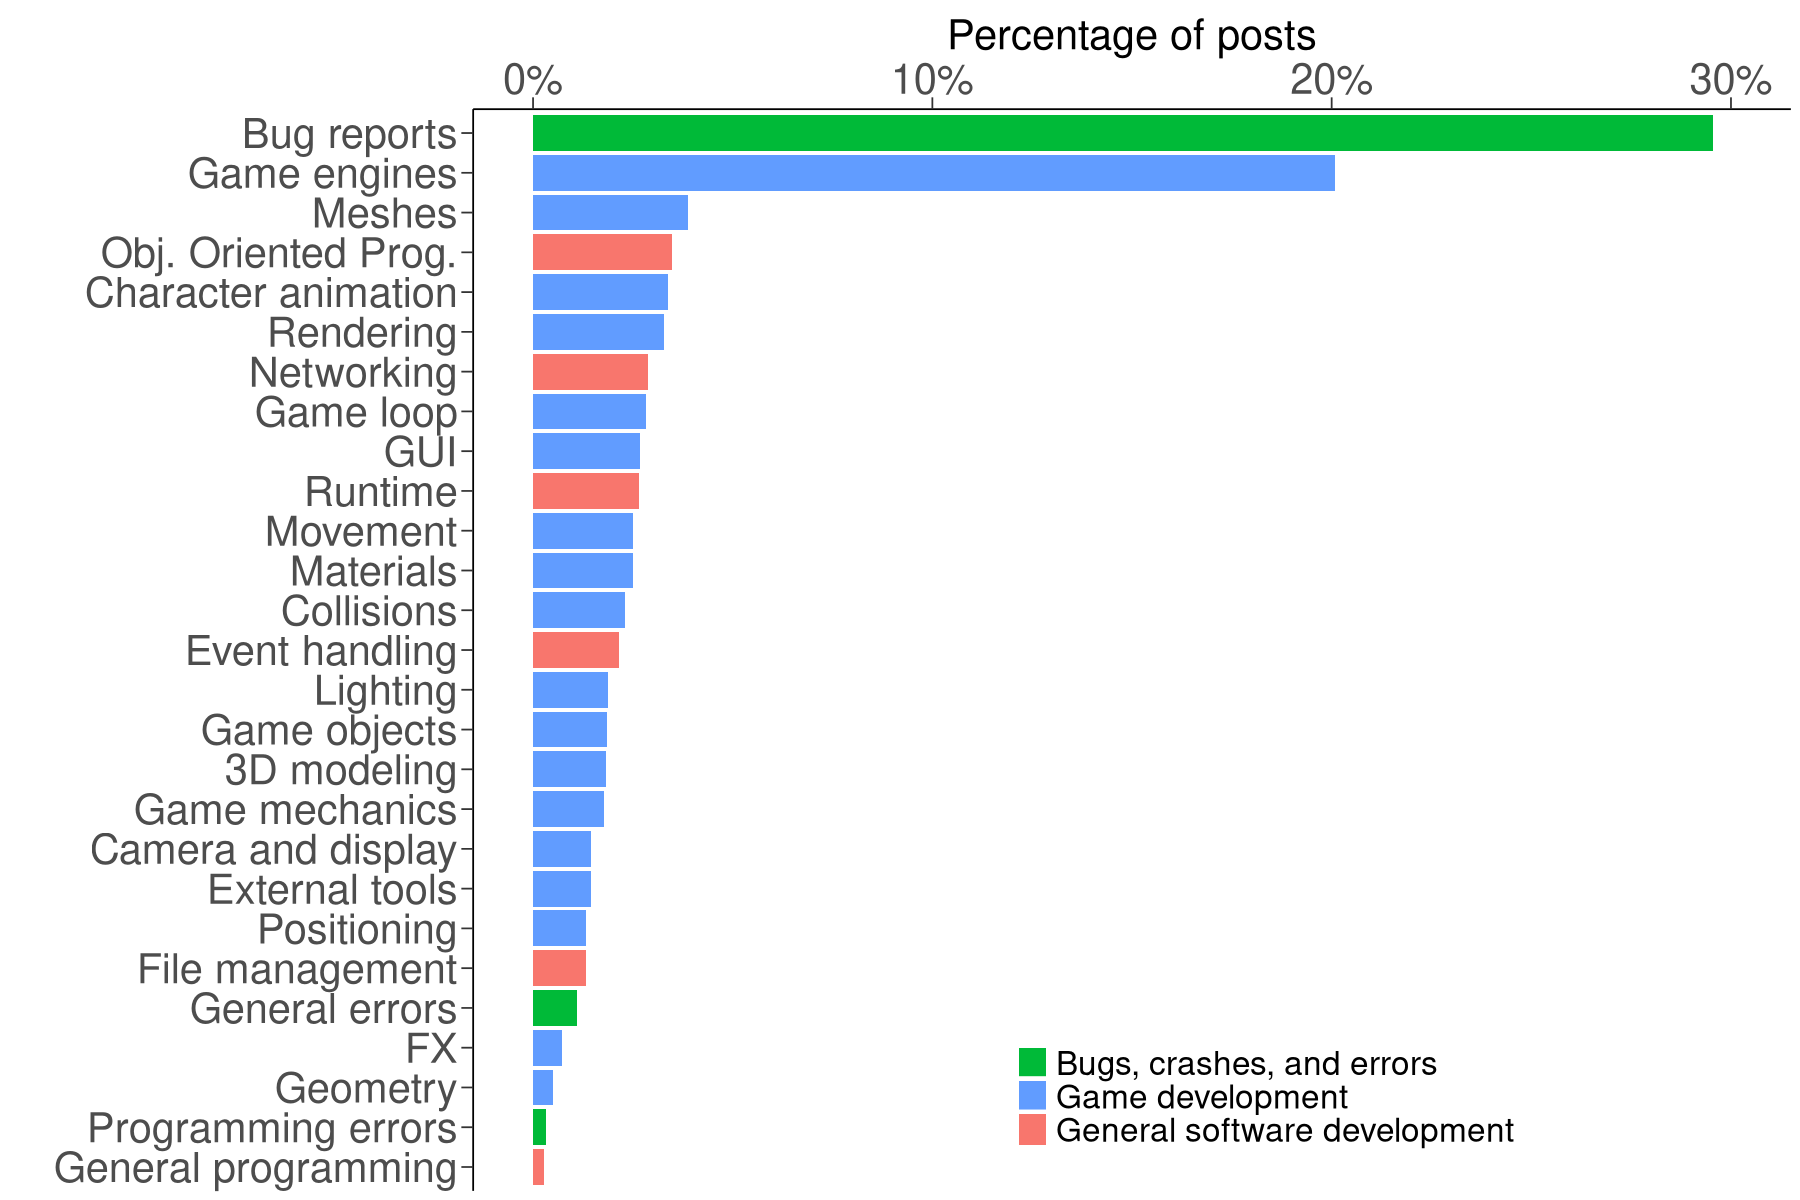

In [109]:
ue4$posts %>% 
    topic_dist() %>% 
    save('figures/ue4_topic_dist.pdf', w=3000, h=3000)

In [110]:
ue4$posts %>% 
filter(!is.na(topic_label)) %>% 
group_by(topic_label) %>% 
summarise(n = n()) %>% 
ungroup %>% 
mutate(p = n/sum(n)*100) %>% 
arrange(desc(p))

topic_label,n,p
<fct>,<int>,<dbl>
Bug reports,222579,29.0534799
Game engines,151146,19.7292524
Meshes,29172,3.8078530
Object Oriented Programming,26149,3.4132575
Character animation,25510,3.3298482
Rendering,24613,3.2127618
Networking,21708,2.8335689
Game loop,21285,2.7783543
GUI,20165,2.6321595


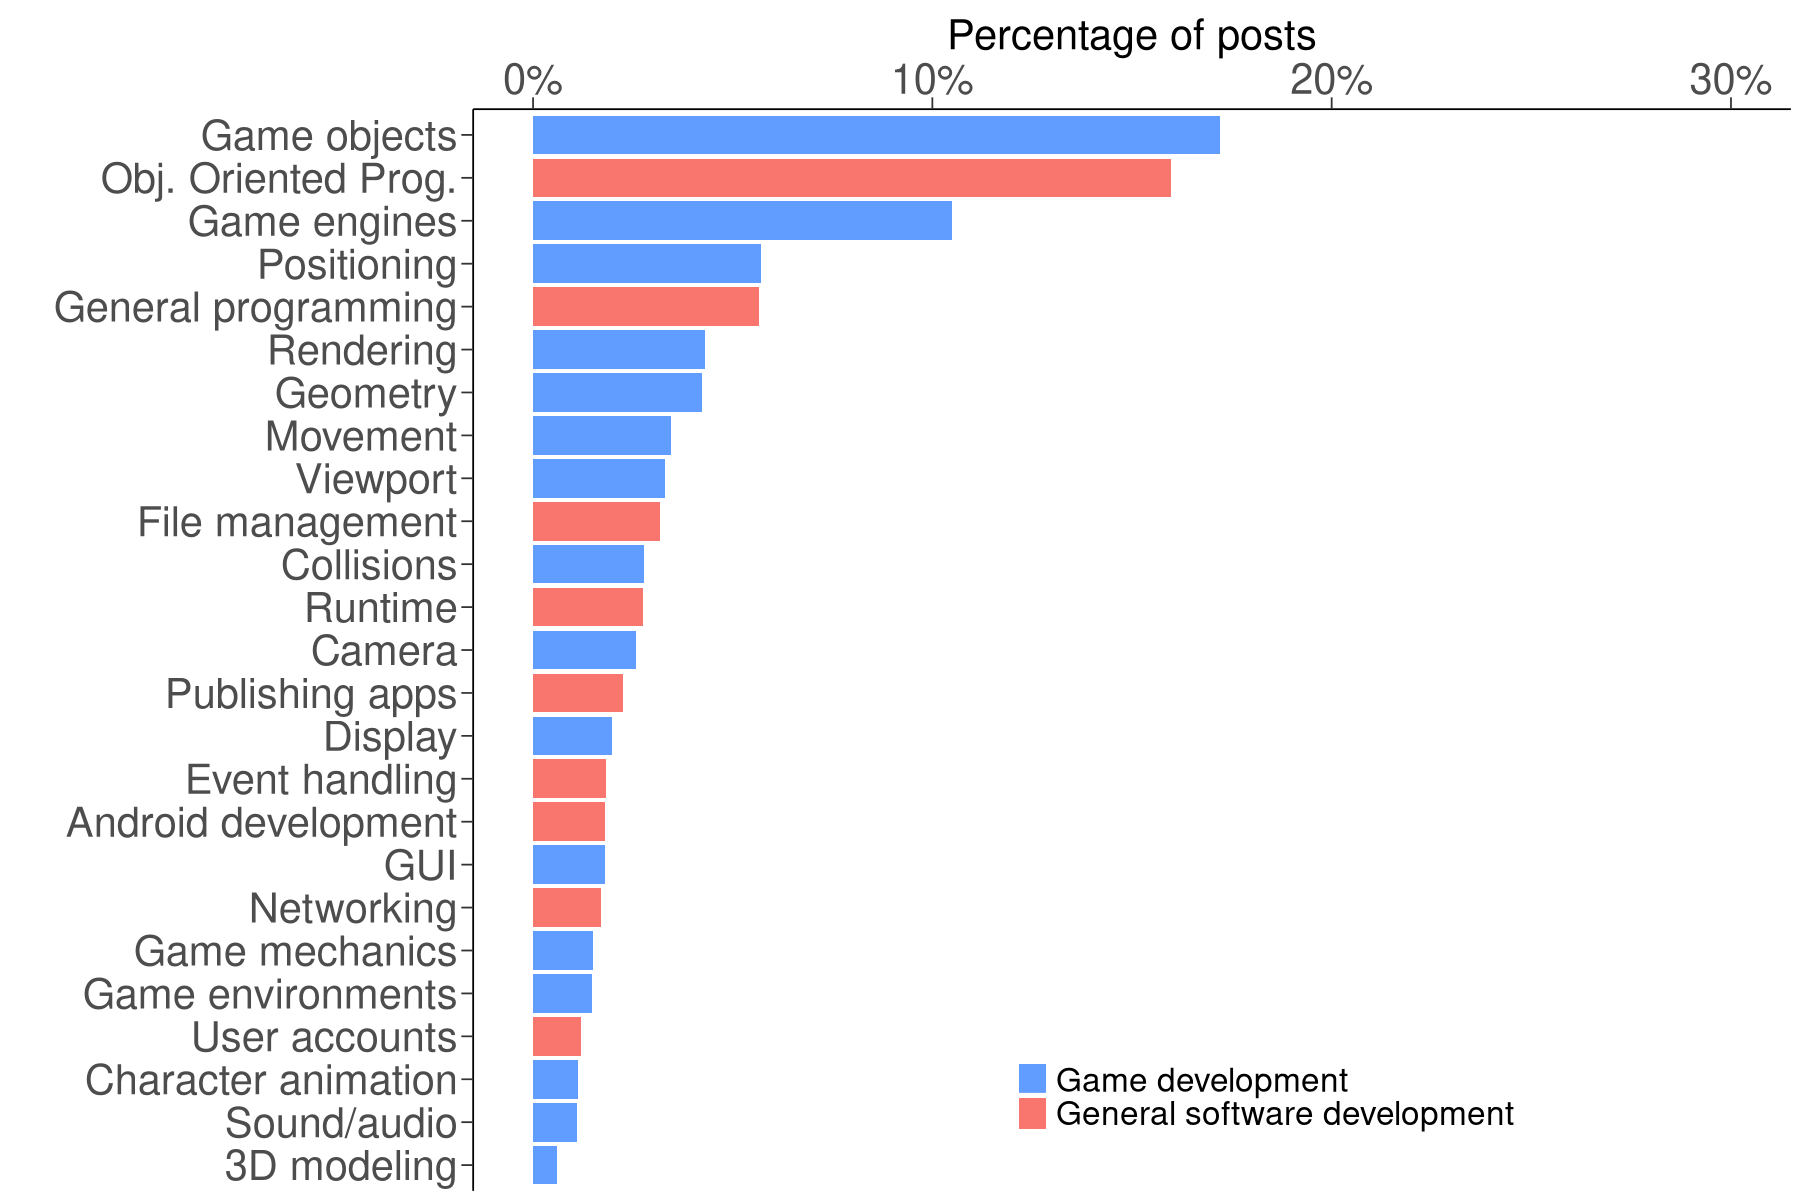

In [111]:
so$posts %>% 
    topic_dist() %>% 
    save('figures/so_topic_dist.pdf', w=3000, h=3000)

In [112]:
so$posts %>% 
filter(!is.na(topic_label)) %>% 
group_by(topic_label) %>% 
summarise(n = n()) %>% 
ungroup %>% 
mutate(p = n/sum(n)*100) %>% 
arrange(desc(p))

topic_label,n,p
<fct>,<int>,<dbl>
Game objects,62934,17.1861602
Object Oriented Programming,58430,15.9561976
Game engines,38391,10.4839018
Positioning,20891,5.7049619
General programming,20674,5.6457031
Rendering,15712,4.2906688
Geometry,15459,4.2215790
Movement,12615,3.4449330
Viewport,12123,3.3105765


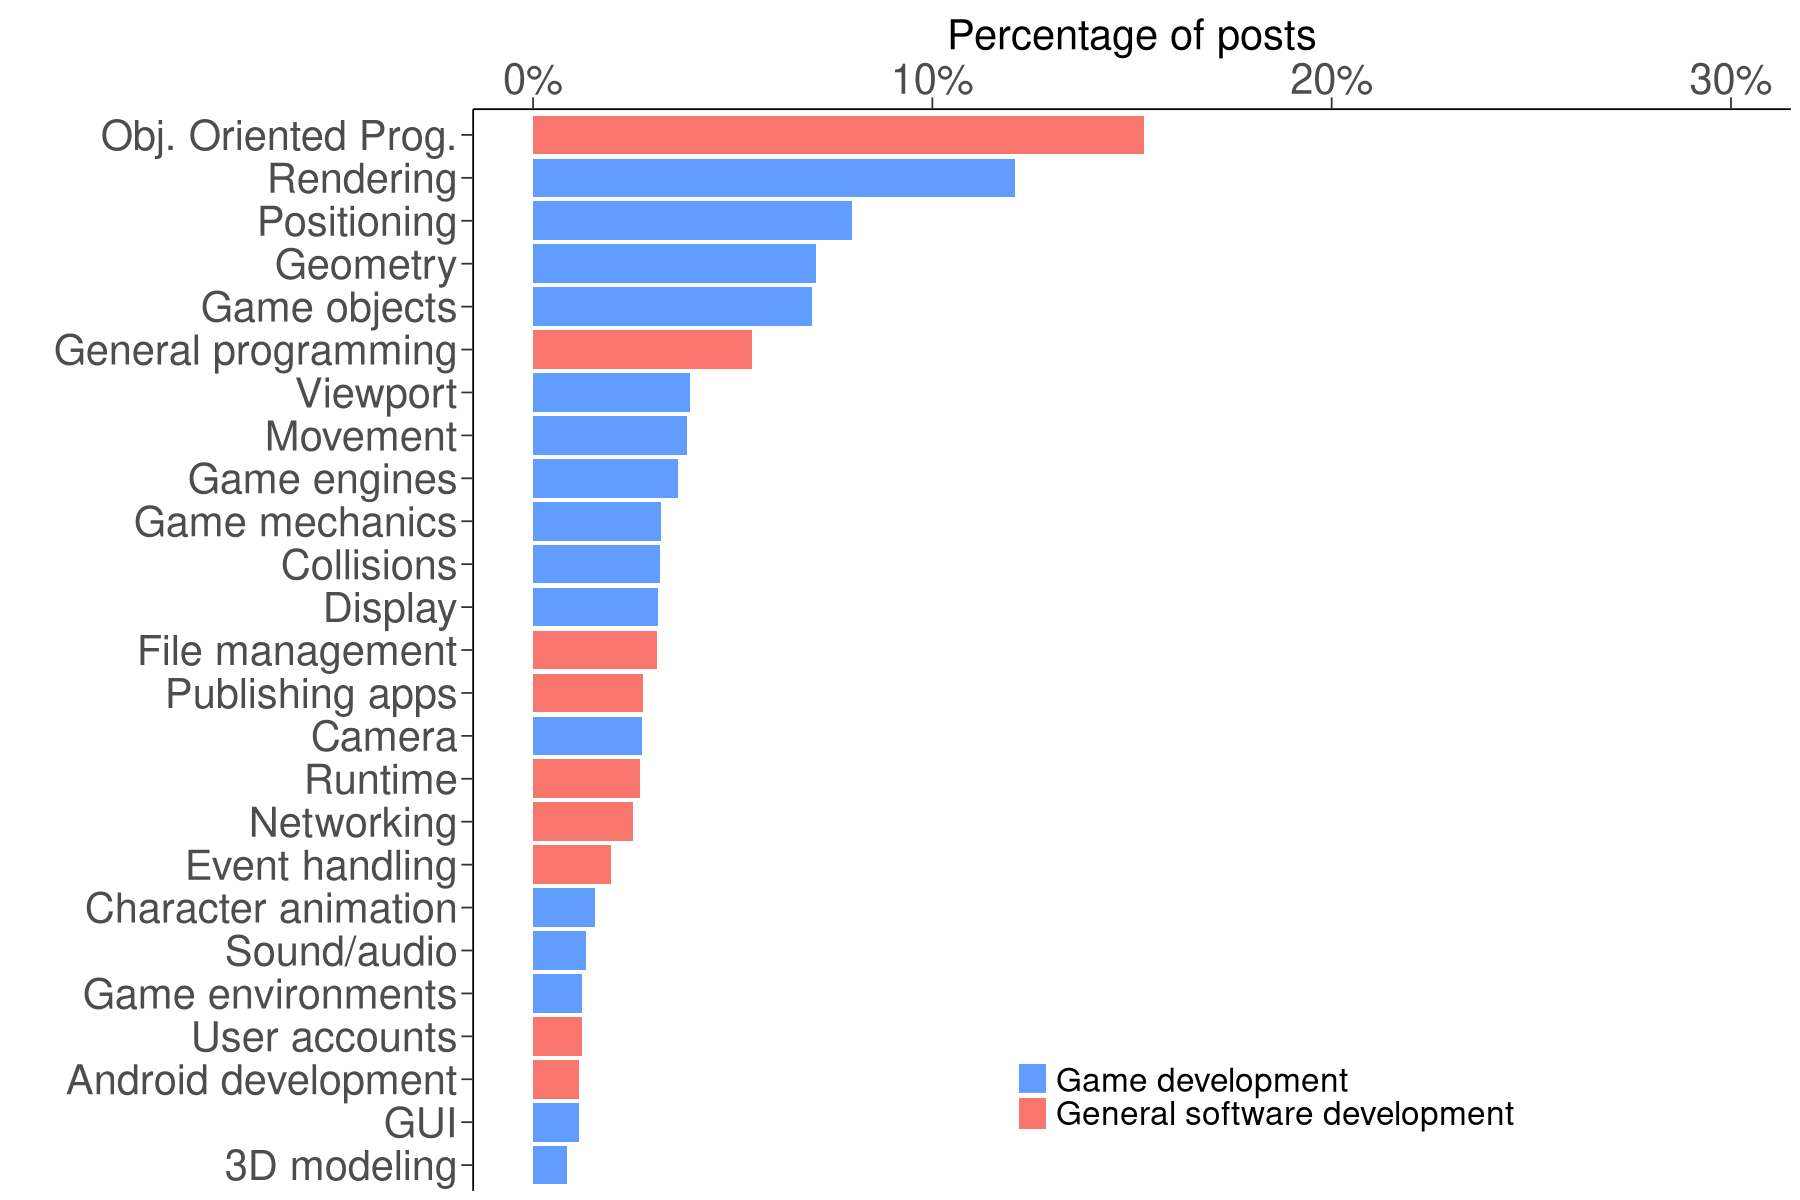

In [113]:
se$posts %>% 
    topic_dist() %>% 
    save('figures/se_topic_dist.pdf', w=3000, h=3000)

In [114]:
se$posts %>% 
filter(!is.na(topic_label)) %>% 
group_by(topic_label) %>% 
summarise(n = n()) %>% 
ungroup %>% 
mutate(p = n/sum(n)*100) %>% 
arrange(desc(p))

topic_label,n,p
<fct>,<int>,<dbl>
Object Oriented Programming,51671,15.2646972
Rendering,40784,12.0484490
Positioning,26934,7.9568685
Geometry,23896,7.0593796
Game objects,23586,6.9677991
General programming,18512,5.4688331
Viewport,13253,3.9152142
Movement,13023,3.8472674
Game engines,12250,3.6189069


## 2.6 The percentage of posts changed over time for several topics.

In [115]:
topic_trends <- function(posts) {
    monthly_topic_counts <- posts %>% 
      filter(!is.na(post_month), !is.na(topic)) %>% 
      group_by(post_month, topic_label) %>% 
      count() %>% 
      ungroup %>% 
      group_by(post_month) %>% 
      mutate(p = n/sum(n)) %>% 
      ungroup %>% 
      complete(post_month, topic_label, fill=list(n=0, p=0.0)) %>% 
      arrange(post_month)
    
    monthly_topic_counts %>% 
      group_by(topic_label) %>% 
      summarise(
        inc = cox.stuart.test(p, alternative = 'right.sided')$p.value,
        dec = cox.stuart.test(p, alternative = 'left.sided')$p.value,
        max = max(p)*100,
        min = min(p)*100,
        diff = max-min
      ) %>% 
      ungroup %>% 
      filter(inc < 0.05/52 | dec < 0.05/52) %>% 
      mutate(change = ifelse(inc < 0.05/52, 'Increase', 'Decrease')) %>% 
      arrange(change)
}

In [116]:
unity$posts %>%
  topic_trends %>%
  group_by(change) %>%
  summarise(n = n())

,change,n
,<chr>,<int>
1,Decrease,9
2,Increase,6


In [117]:
ue4$posts %>%
  topic_trends %>%
  group_by(change) %>%
  summarise(n = n())

,change,n
,<chr>,<int>
1,Decrease,2
2,Increase,13


In [118]:
so$posts %>%
  topic_trends %>%
  group_by(change) %>%
  summarise(n = n())

,change,n
,<chr>,<int>
1,Decrease,2
2,Increase,8


In [119]:
se$posts %>%
  topic_trends %>%
  group_by(change) %>%
  summarise(n = n())

,change,n
,<chr>,<int>
1,Decrease,4
2,Increase,4


# RQ3

## 3.1 Most topics are significantly different. However, most differences are negligible.

In [133]:
topic_comps <- read.csv('../../data/topic_comparisons/topic_comparisons.csv')
website_comps <- read.csv('../../data/topic_comparisons/websites_topic_comparisons.csv')

In [121]:
topic_comps %>%
  group_by(website) %>%
  summarise(
      comps = n(),
      diff = sum(!is.na(difference)),
      non_neg = sum(!is.na(delta) & delta != 'negligible'),
      not_small = sum(!is.na(delta) & delta != 'negligible' & delta != 'small')) %>%
  bind_rows(summarise_all(., ~if(is.numeric(.)) sum(.) else "Total")) %>%
  mutate(
      perc_diff = round(diff/comps*100),
      perc_non_neg = round(non_neg/diff*100))

website,comps,diff,non_neg,not_small,perc_diff,perc_non_neg
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
gamedev_se,250,122,14,2,49,11
stackoverflow,250,131,14,1,52,11
ue4,270,189,27,0,70,14
unity,270,234,35,1,87,15
Total,1040,676,90,4,65,13


In [122]:
website_comps %>%
  group_by(websites) %>%
  summarise(
      comps = n(),
      diff = sum(!is.na(difference)),
      non_neg = sum(!is.na(delta) & delta != 'negligible'),
      not_small = sum(!is.na(delta) & delta != 'negligible' & delta != 'small')) %>%
  bind_rows(summarise_all(., ~if(is.numeric(.)) sum(.) else "Total")) %>%
  mutate(
      perc_diff = round(diff/comps*100),
      perc_non_neg = round(non_neg/diff*100))

websites,comps,diff,non_neg,not_small,perc_diff,perc_non_neg
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
stackoverflow/gamedev_se,250,175,30,5,70,17
unity/ue4,270,208,46,19,77,22
Total,520,383,76,24,74,20


## 3.2 The frequency in which game developers discussed code varied for some topics.

In [123]:
topic_comps %>%
  filter(aspect == 'has_code', delta != 'negligible') %>%
  arrange(topic) %>%
  mutate(code_topic = round(mean*100), code_others = round(mean_others*100)) %>%
  select(topic, post_type, website, code_topic, code_others) 

topic,post_type,website,code_topic,code_others
<chr>,<chr>,<chr>,<dbl>,<dbl>
File management,answers,ue4,23,8
Game loop,questions,unity,56,39
Game objects,questions,unity,56,38
Game objects,answers,unity,49,34
Game objects,questions,stackoverflow,91,61
Game objects,answers,stackoverflow,92,44
Game objects,questions,gamedev_se,86,42
Game objects,answers,gamedev_se,89,31
General errors,questions,unity,63,39


## 3.3 Many topics differ in the length of the text in all post types.

In [124]:
topic_comps %>%
  filter(aspect == 'len_text', delta != 'negligible', post_type != 'comments') %>%
  arrange(topic) %>%
  select(topic, post_type, website, med, med_others) 

topic,post_type,website,med,med_others
<chr>,<chr>,<chr>,<dbl>,<dbl>
Character animation,answers,ue4,316.0,253
Collisions,answers,unity,310.0,222
Collisions,answers,ue4,330.0,253
Collisions,answers,stackoverflow,397.0,319
FX,answers,ue4,335.0,254
Game mechanics,answers,unity,291.0,225
Game mechanics,answers,gamedev_se,908.5,556
Game objects,answers,unity,290.0,221
Game objects,answers,ue4,305.0,253


In [125]:
topic_comps %>%
  filter(!is.na(difference), delta != 'negligible') %>% 
  group_by(aspect) %>% 
  count %>%
  ungroup %>%
  mutate(perc = n / sum(n)) 

aspect,n,perc
<chr>,<int>,<dbl>
has_code,25,0.27777778
len_text,63,0.70000000
n_responses,2,0.02222222


In [126]:
topic_comps %>%
  filter(!is.na(difference), delta != 'negligible', aspect=='len_text') %>% 
  group_by(post_type) %>%
  count

post_type,n
<chr>,<int>
answers,23
comments,37
questions,3


In [127]:
topic_comps %>%
  filter(!is.na(difference), delta != 'negligible', aspect=='len_text') %>% 
  distinct(topic) %>%
  count

n
<int>
21


In [128]:
topic_comps %>%
  filter(!is.na(difference), delta != 'negligible', aspect=='len_text', post_type != 'comments') %>% 
  distinct(topic) %>%
  count

n
<int>
12


## 3.4 Posts on Unity Answers and Stack Overflow discussed code more frequently than on the UE4 AnswerHub and the Game Development Stack Exchange.

In [129]:
website_comps %>%
    filter(!is.na(difference), delta != 'negligible') %>% 
    group_by(websites) %>%
    distinct(topic) %>%
    count

websites,n
<chr>,<int>
stackoverflow/gamedev_se,20
unity/ue4,23


In [130]:
website_comps %>%
    filter(!is.na(difference), delta != 'negligible') %>% 
    group_by(websites, difference, delta, aspect) %>%
    count

websites,difference,delta,aspect,n
<chr>,<chr>,<chr>,<chr>,<int>
stackoverflow/gamedev_se,greater,medium,has_code,5
stackoverflow/gamedev_se,greater,small,has_code,25
unity/ue4,greater,large,has_code,4
unity/ue4,greater,medium,has_code,15
unity/ue4,greater,small,has_code,27


In [131]:
website_comps %>%
  filter(!is.na(difference), delta != 'negligible', websites=='unity/ue4') %>%
  arrange(diff_mean)

topic,aspect,difference,delta,mean,mean_others,diff_mean,med,med_others,diff_med,websites,post_type
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
General programming,has_code,greater,large,0.8418303,0.23170732,-0.6101230,1,0,-1,unity/ue4,questions
Positioning,has_code,greater,large,0.5915368,0.08939709,-0.5021398,1,0,-1,unity/ue4,questions
Movement,has_code,greater,large,0.5568903,0.06731583,-0.4895744,1,0,-1,unity/ue4,questions
Game loop,has_code,greater,large,0.5594861,0.08389585,-0.4755902,1,0,-1,unity/ue4,questions
Game mechanics,has_code,greater,medium,0.4874234,0.04963145,-0.4377920,0,0,0,unity/ue4,questions
General programming,has_code,greater,medium,0.6216769,0.19360902,-0.4280679,1,0,-1,unity/ue4,answers
Movement,has_code,greater,medium,0.4949864,0.07492245,-0.4200640,0,0,0,unity/ue4,answers
Game loop,has_code,greater,medium,0.4935733,0.07538036,-0.4181929,0,0,0,unity/ue4,answers
Game objects,has_code,greater,medium,0.5625395,0.14487633,-0.4176632,1,0,-1,unity/ue4,questions


In [132]:
website_comps %>%
  filter(!is.na(difference), delta != 'negligible', websites=='stackoverflow/gamedev_se') %>%
  arrange(diff_mean)

topic,aspect,difference,delta,mean,mean_others,diff_mean,med,med_others,diff_med,websites,post_type
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Game mechanics,has_code,greater,medium,0.7599154,0.3716535,-0.3882618,1.0,0,-1.0,stackoverflow/gamedev_se,questions
Networking,has_code,greater,medium,0.5881561,0.2394930,-0.3486631,1.0,0,-1.0,stackoverflow/gamedev_se,questions
User accounts,has_code,greater,medium,0.5608899,0.2162850,-0.3446049,1.0,0,-1.0,stackoverflow/gamedev_se,questions
General programming,has_code,greater,medium,0.8289683,0.4963325,-0.3326357,1.0,0,-1.0,stackoverflow/gamedev_se,questions
Runtime,has_code,greater,medium,0.6579361,0.3268877,-0.3310484,1.0,0,-1.0,stackoverflow/gamedev_se,questions
Game mechanics,has_code,greater,small,0.5000000,0.1724627,-0.3275373,0.5,0,-0.5,stackoverflow/gamedev_se,answers
Object Oriented Programming,has_code,greater,small,0.7824413,0.4659043,-0.3165370,1.0,0,-1.0,stackoverflow/gamedev_se,questions
Sound/audio,has_code,greater,small,0.6527607,0.3427673,-0.3099934,1.0,0,-1.0,stackoverflow/gamedev_se,questions
Publishing apps,has_code,greater,small,0.4050633,0.1063636,-0.2986997,0.0,0,0.0,stackoverflow/gamedev_se,questions
